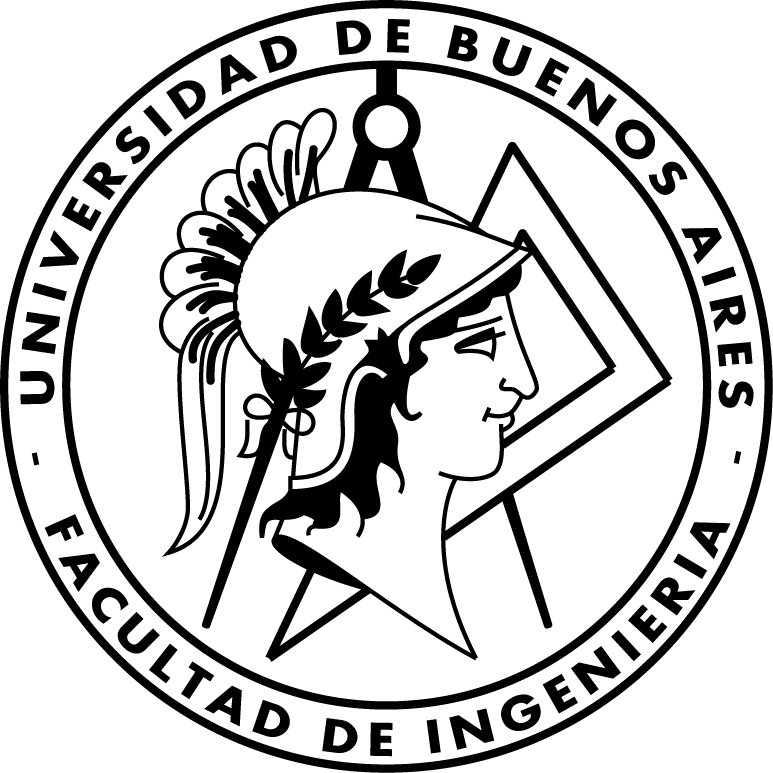

# *Organización de datos 75.06/ 95.58*

#  Trabajo práctico 1

# Análisis exploratorio de datos 

**Primero cuatrimestre del 2020**

Grupo n°16 	Grupo Phyton Fiuba

Apellido y nombre    | Padrón

Alejandro Balladares | 101118

Jonathan Galván Pérez| 101250

Ronnie Del Pino      | 93575

Marcelo Mastroianni  | 88782

# Indice

Proximamente :v

# Introducción

Introducción generica 

# 2. Lectura de datos y primeras impresiones

## 2.0 Análisis general

Se dispone de un archivo csv que nos brinda información sobre distintos tweets. Este consiste en un dataset de [] lines y 5 columnas.  Cada línea del archivo nos da información sobre uno de los tweets. Se realiza la lectura de los datos y se muestra una vista rápida para poder familiarizarnos con la información incluida en el archivo. 

In [599]:
#importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs



from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (20, 10)


## 2.1 Estructura de los datos

Como primer paso tomamos una muestra de nuestro set de datos para hacer un relevamiento mínimo pero necesario para conocer su estructura. Para eso importamos los datos y usamos el metodo 'head()'

In [640]:
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Mostramos el tamaño del DataFrame usando el atributo 'shape' donde se muestra la tupla (m, n) donde m y n son la cantidad de filas y columnas respectivamente.

In [600]:
df.shape

(7613, 5)

Mostramos características de los datos: Tipos de datos, valores faltantes y el tamaño en memoria.

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


De la tabla anterior se podemos filtrar datos por el tipo(int, object) para obtener rapidamente información que nos pueda parecer revelante.

In [647]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
id,"7,613.00","5,441.93","3,137.12",1.00,"2,734.00","5,408.00","8,146.00","10,873.00"
target,"7,613.00",0.43,0.50,0.00,0.00,0.00,1.00,1.00


Dado que el 'target' alterna entre valores 1 y 0 no nos aporta información que consideramos importante para nuestro estudio. De igual manera el campo 'id' no aporta datos relevantes ya que solo representan un valor identificatorio para las filas.

In [646]:
df.describe(include=[np.object]).T

,count,unique,top,freq
keyword,7552,221,fatalities,45
location,5080,3341,USA,104
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10


En este caso sí podemos apreciar información que nos permita analizar, transformar y modelar el conjunto del set de datos.

## 2.1.1 Datos faltantes en el Dataframe

No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber la cantidad de datos faltantes en cada columna del DataFrame. Se procedió a hacer un conteo de la cantidad de datos nulos y comparar usando el total de datos.

No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber la cantidad de datos faltantes en cada columna del DataFrame. Se procedió a hacer un conteo de la cantidad de datos nulos y comparar usando el total de datos.

In [603]:
columnas = ['id', 'text', 'target', 'keyword', 'location']
nulls = pd.DataFrame(df[columnas].isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls = nulls.reset_index()
nulls

,index,nulls,porcentaje
0,id,0,0.00
1,text,0,0.00
2,target,0,0.00
3,keyword,61,0.80
4,location,2533,33.27


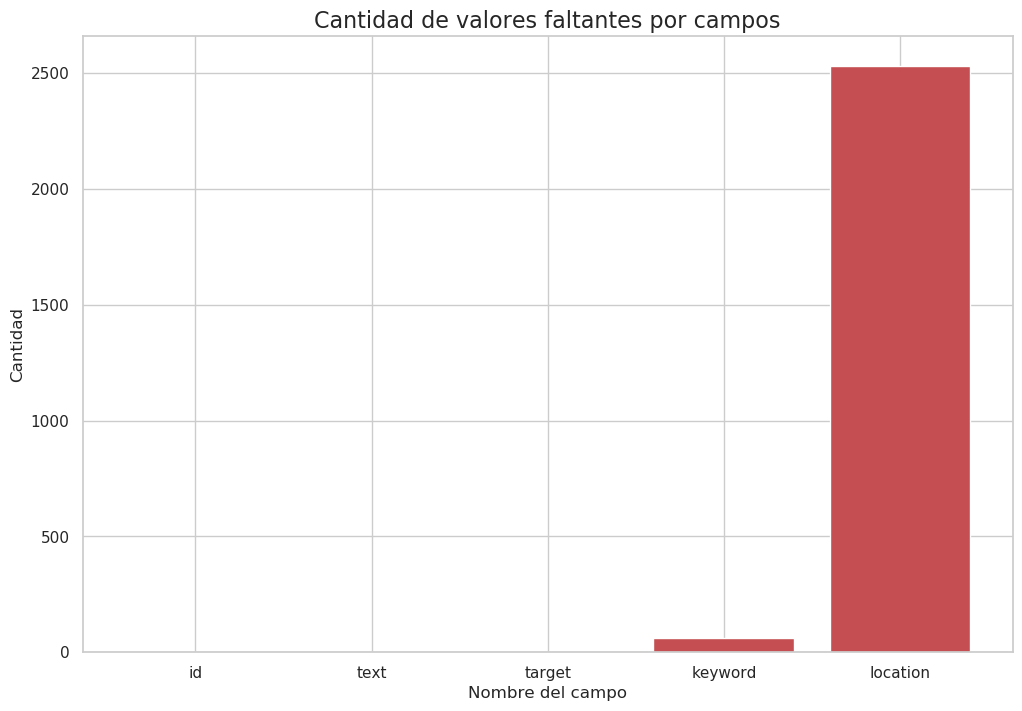

In [604]:
# Tamaño
plt.figure(figsize=(12,8))
# Título
plt.title('Cantidad de valores faltantes por campos', fontsize=16)
# Eje X
plt.xlabel('Nombre del campo')
# Eje Y
plt.ylabel('Cantidad')
plt.bar(height=nulls["nulls"], x=nulls["index"], color='C3')

plt.show()

Conclusión del gráfico: 

# Titulo

Vistas algunas características de nuestro dataframe procedemos con el análisis exploratorio del mismo para así sacar conclusiones sobre los tweets y sus veracidades. #mejorar

## Analisis de los targets

Ahora analizaremos el target de los tweets que nos dirá si son verdaderos (target=1) o falsos (targe=0)

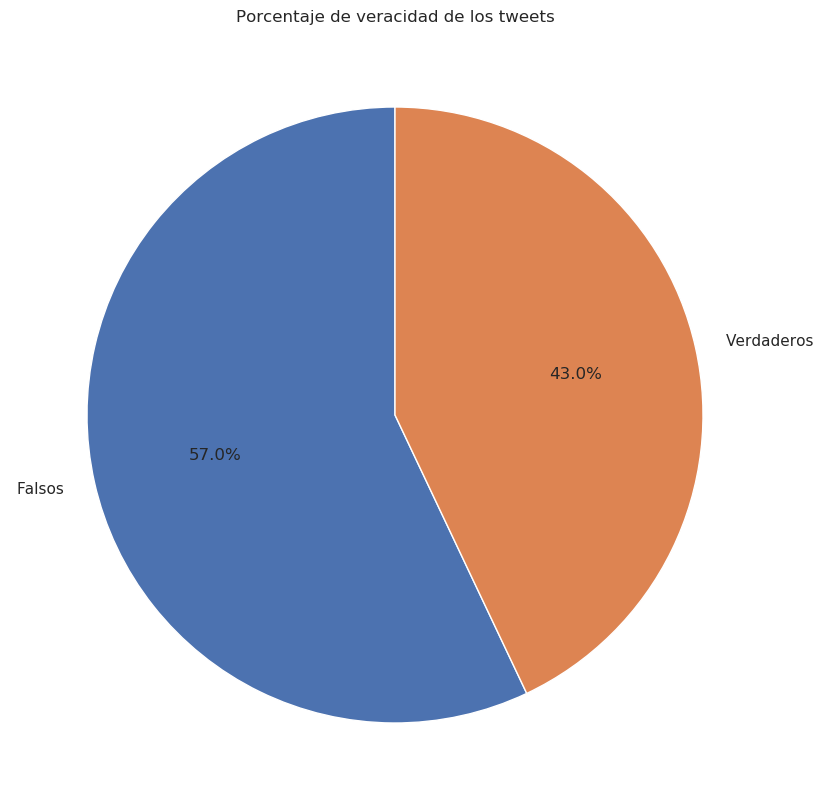

In [605]:
tweets_reales = df[df['target'] == 1]
cant_verdaderos = tweets_reales['target'].count()
tweets_falsos = df[df['target'] == 0]
cant_falsos = tweets_falsos['target'].count()
grafico = plt.pie([cant_falsos, cant_verdaderos],labels=['Falsos', 'Verdaderos'], startangle=90, autopct='%1.1f%%')
plt.title("Porcentaje de veracidad de los tweets")
plt.show(grafico)

Más de la mitad de los tweets son falsos lo que nos indica que no hay que creer todo lo que se ve en Twiter (que novedad).

## Analisis de las keywords o palabras claves

In [606]:
keywords = pd.DataFrame(df['keyword'].value_counts())
keywords.columns = ['cantidad']
#keywords["porcentaje"] = (keywords["cantidad"]*100)/total
#keywords.sort_index()

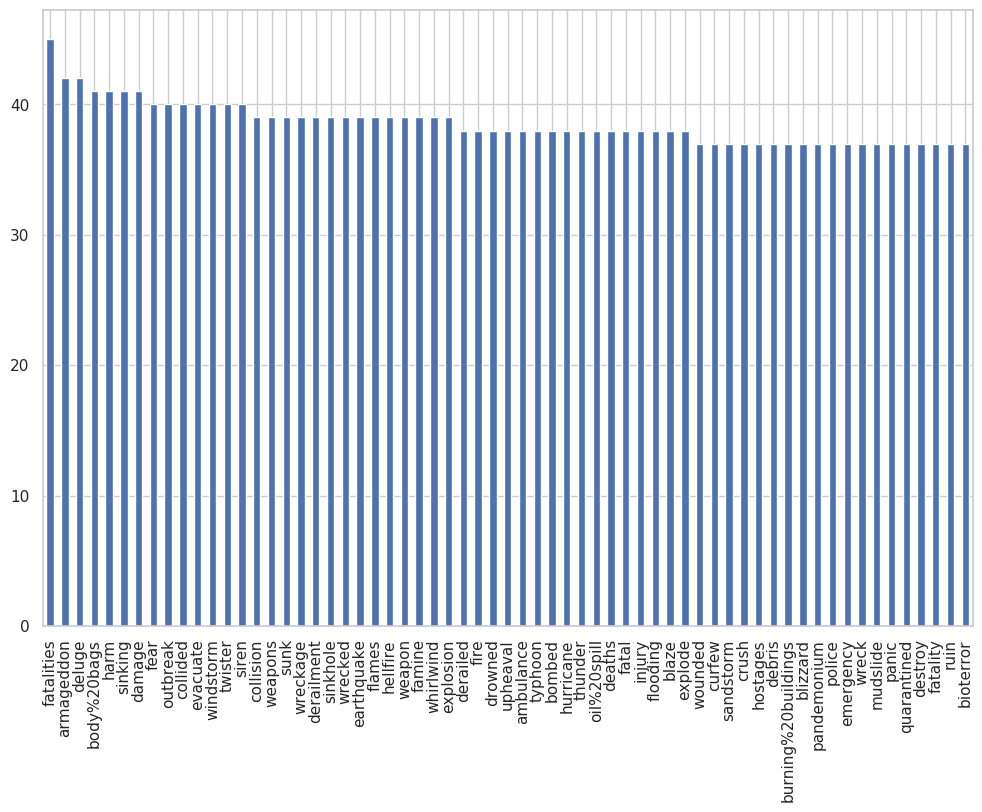

In [607]:
keywords_filtradas = keywords.loc[keywords.cantidad > 36] # <=34 da un grafico horrible
keywords_filtradas["cantidad"].plot(kind="bar",  figsize=(12,8))

Podemos observar que las palabras claves se repiten en gran medida, lo que arruina un poco el gráfico, lo abordaremos desde otro punto de vista

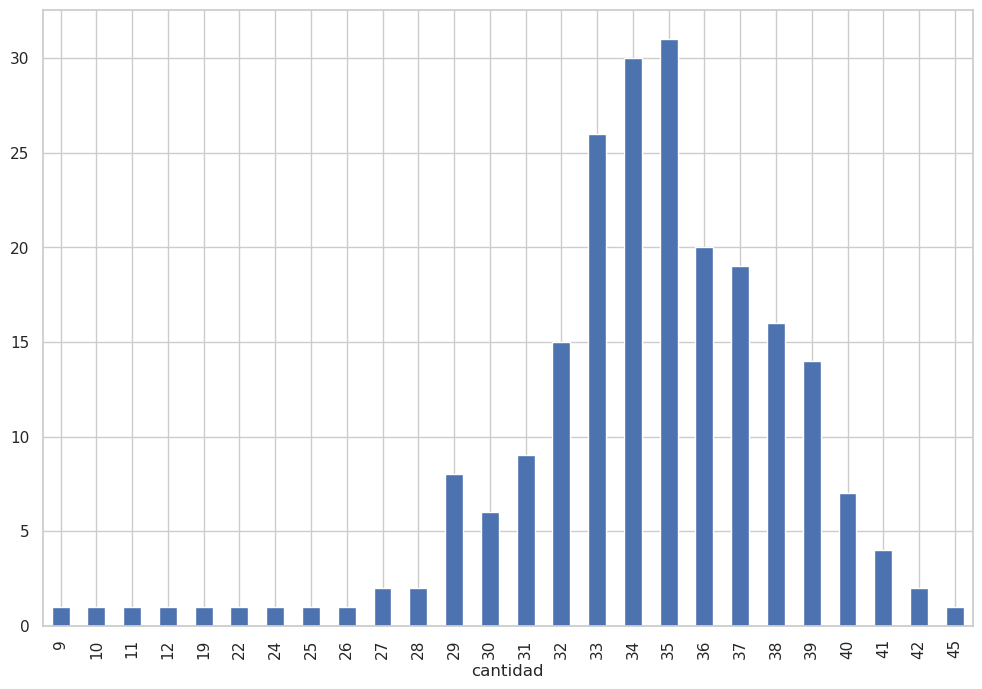

In [608]:
keywords_size = keywords.groupby(['cantidad'])['cantidad'].agg('size')
keywords_size.plot(kind="bar",  figsize=(12,8))

Hay 15 palabras claves que se repiten 32 veces, hay más de 30 que se repiten 35 veces...terminar

## Relación entre las palabras clave y target

In [609]:
#df.info()
ranking = 70

In [610]:
ndf = df.groupby(['keyword', 'target']).agg({'target': 'count'})
ndf = ndf.unstack(level=1)
ndf = ndf.reset_index()
ndf = ndf.droplevel(0, axis=1)
ndf.columns=['keyword', 'Tweets falsos', 'Tweets verdaderos'] 
ndf['Tweets verdaderos'].fillna(0, inplace=True)
ndf['Tweets falsos'].fillna(0, inplace=True)
ndf['keyword'].fillna('empty', inplace=True)
ndf = ndf.set_index('keyword')
ndf = ndf[(ndf['Tweets verdaderos'] + ndf['Tweets falsos']) > 30] # Aparición de 'keyword' mayor a 30 veces
ndf = ndf.apply(lambda x: x*100/sum(x), axis=1)
top_falsos = ndf.sort_values('Tweets falsos', ascending=False).head(ranking)
top_verdaderos = ndf.sort_values('Tweets verdaderos', ascending = False).head(ranking)
top_verdaderos


,Tweets falsos,Tweets verdaderos
keyword,,
wreckage,0.00,100.00
debris,0.00,100.00
derailment,0.00,100.00
outbreak,2.50,97.50
oil%20spill,2.63,97.37
...,...,...
collided,42.50,57.50
police,43.24,56.76
burning%20buildings,43.24,56.76


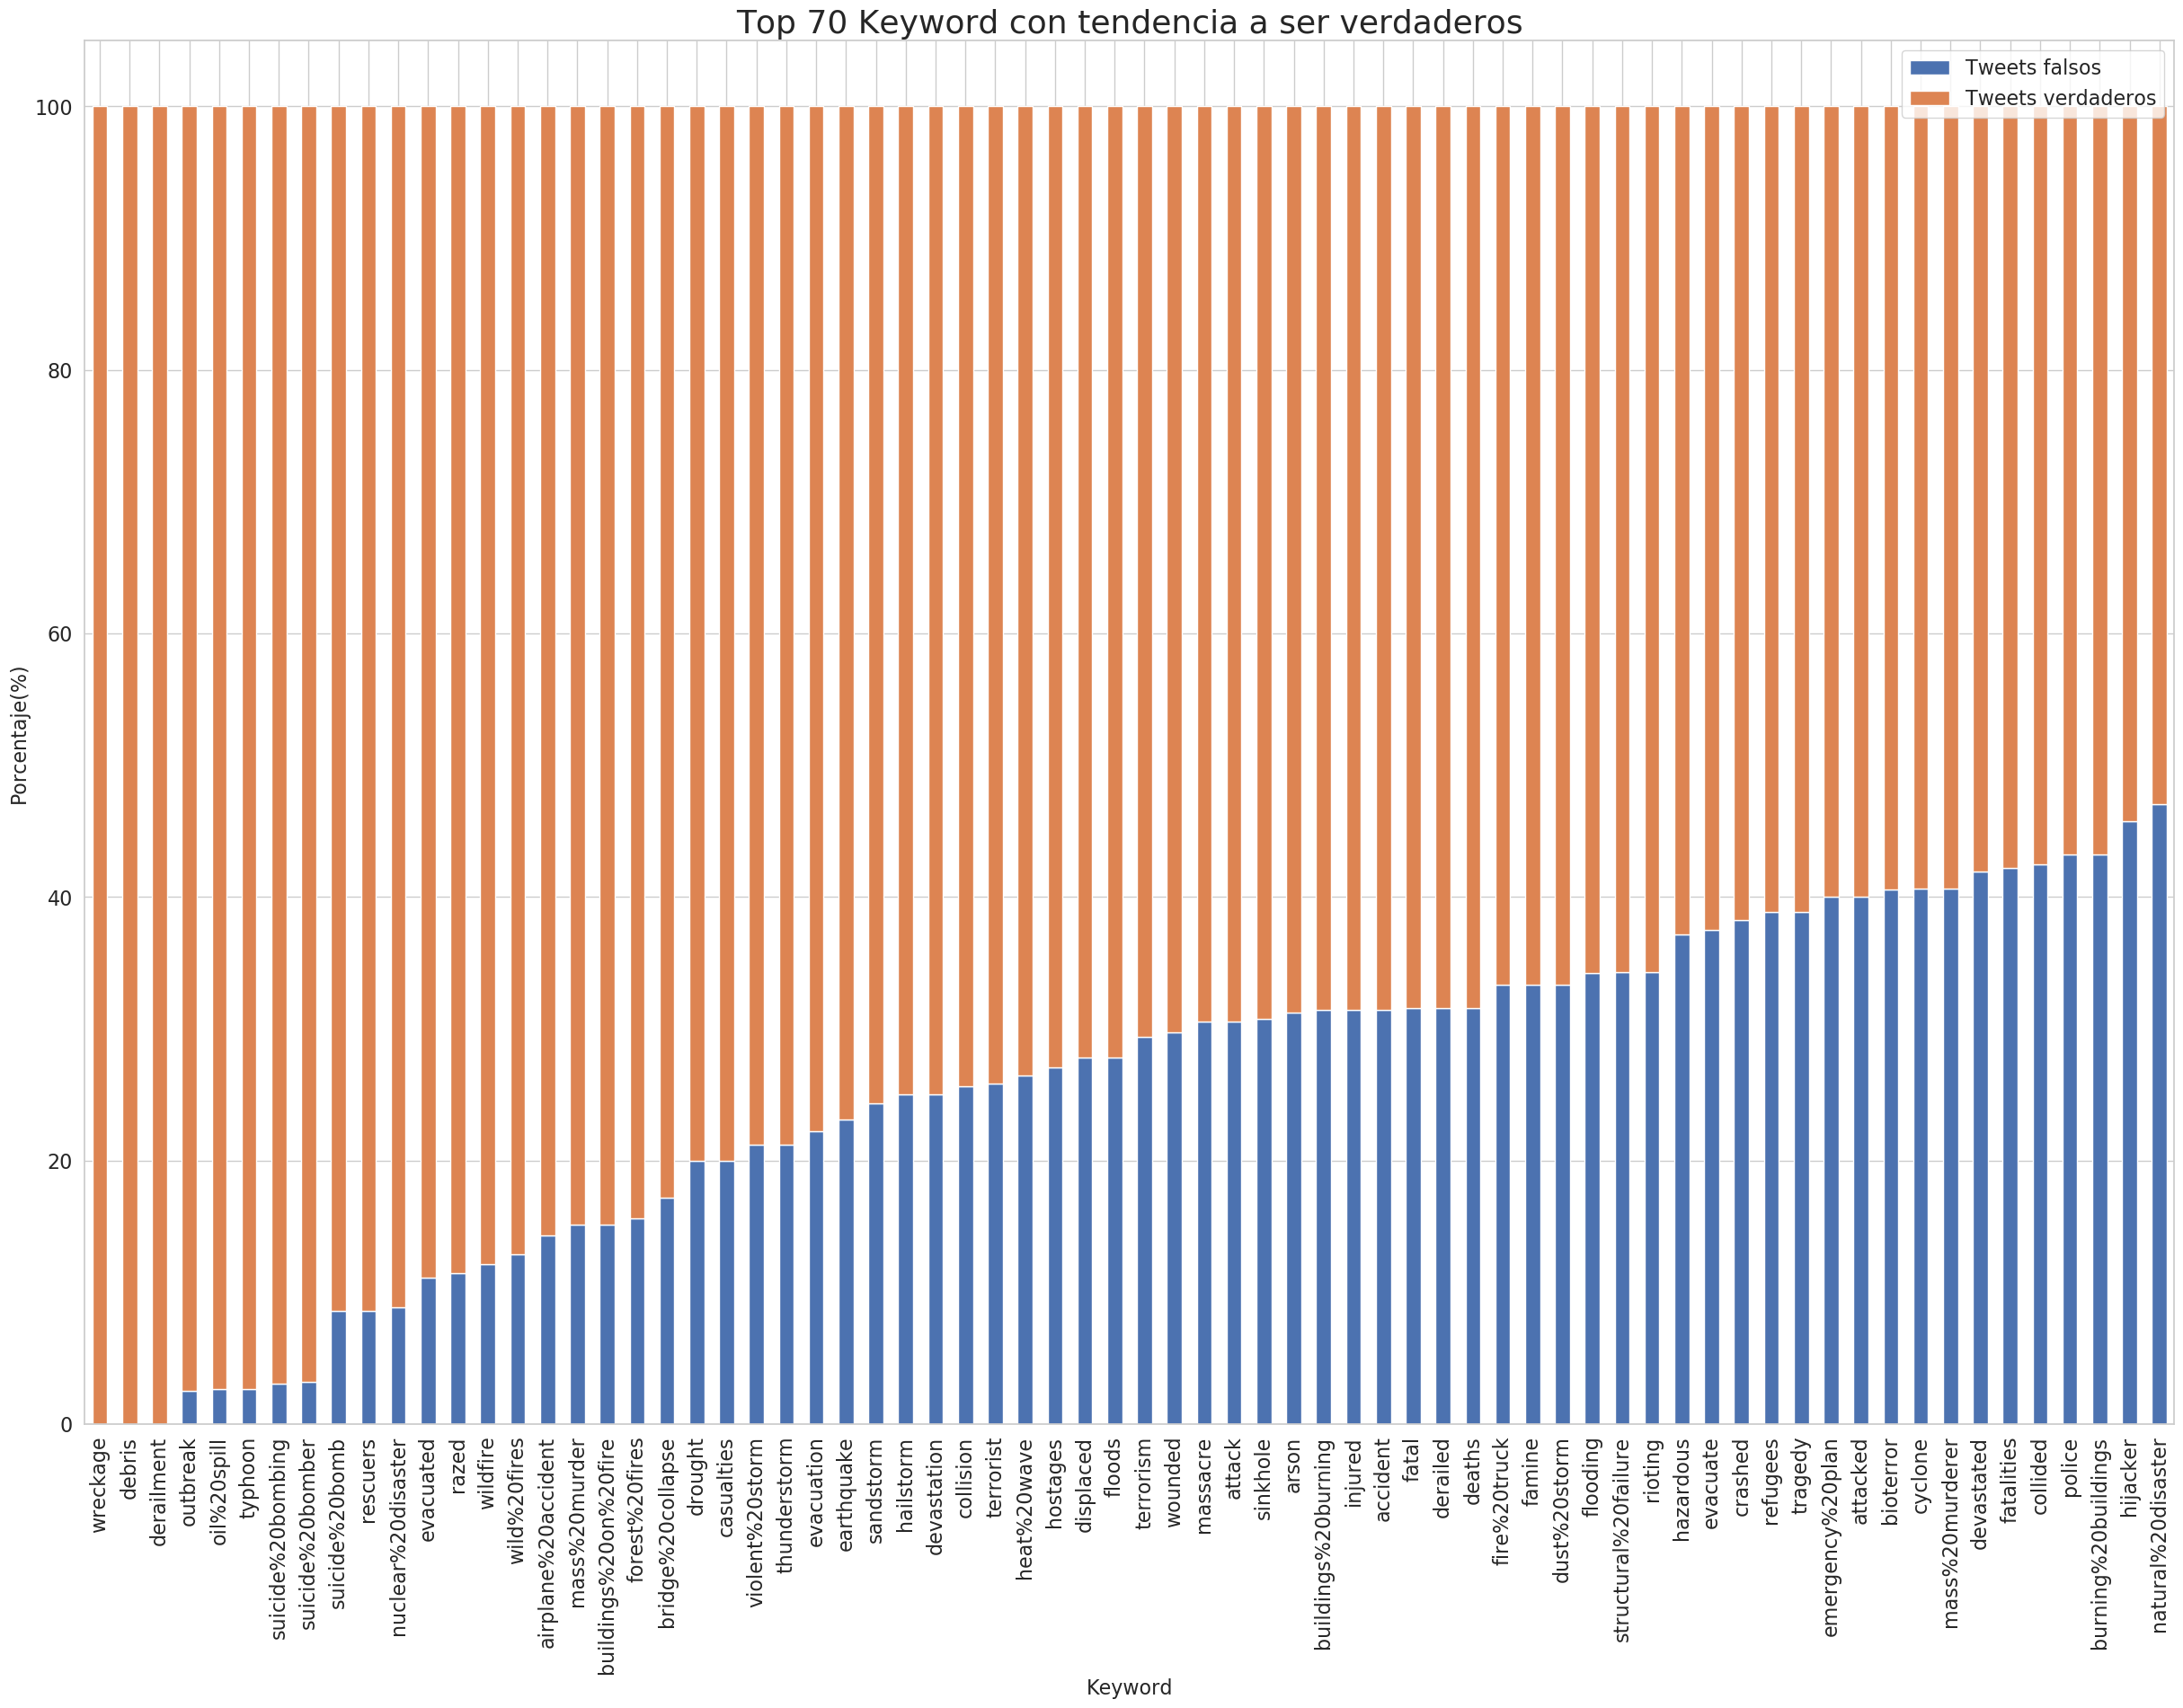

In [611]:
ax = top_verdaderos.plot(kind="bar", stacked=True, fontsize= 16, figsize=(30, 20))
plt.title('Top '+str(ranking)+' Keyword con tendencia a ser verdaderos', fontsize=26)
plt.xlabel("Keyword", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)

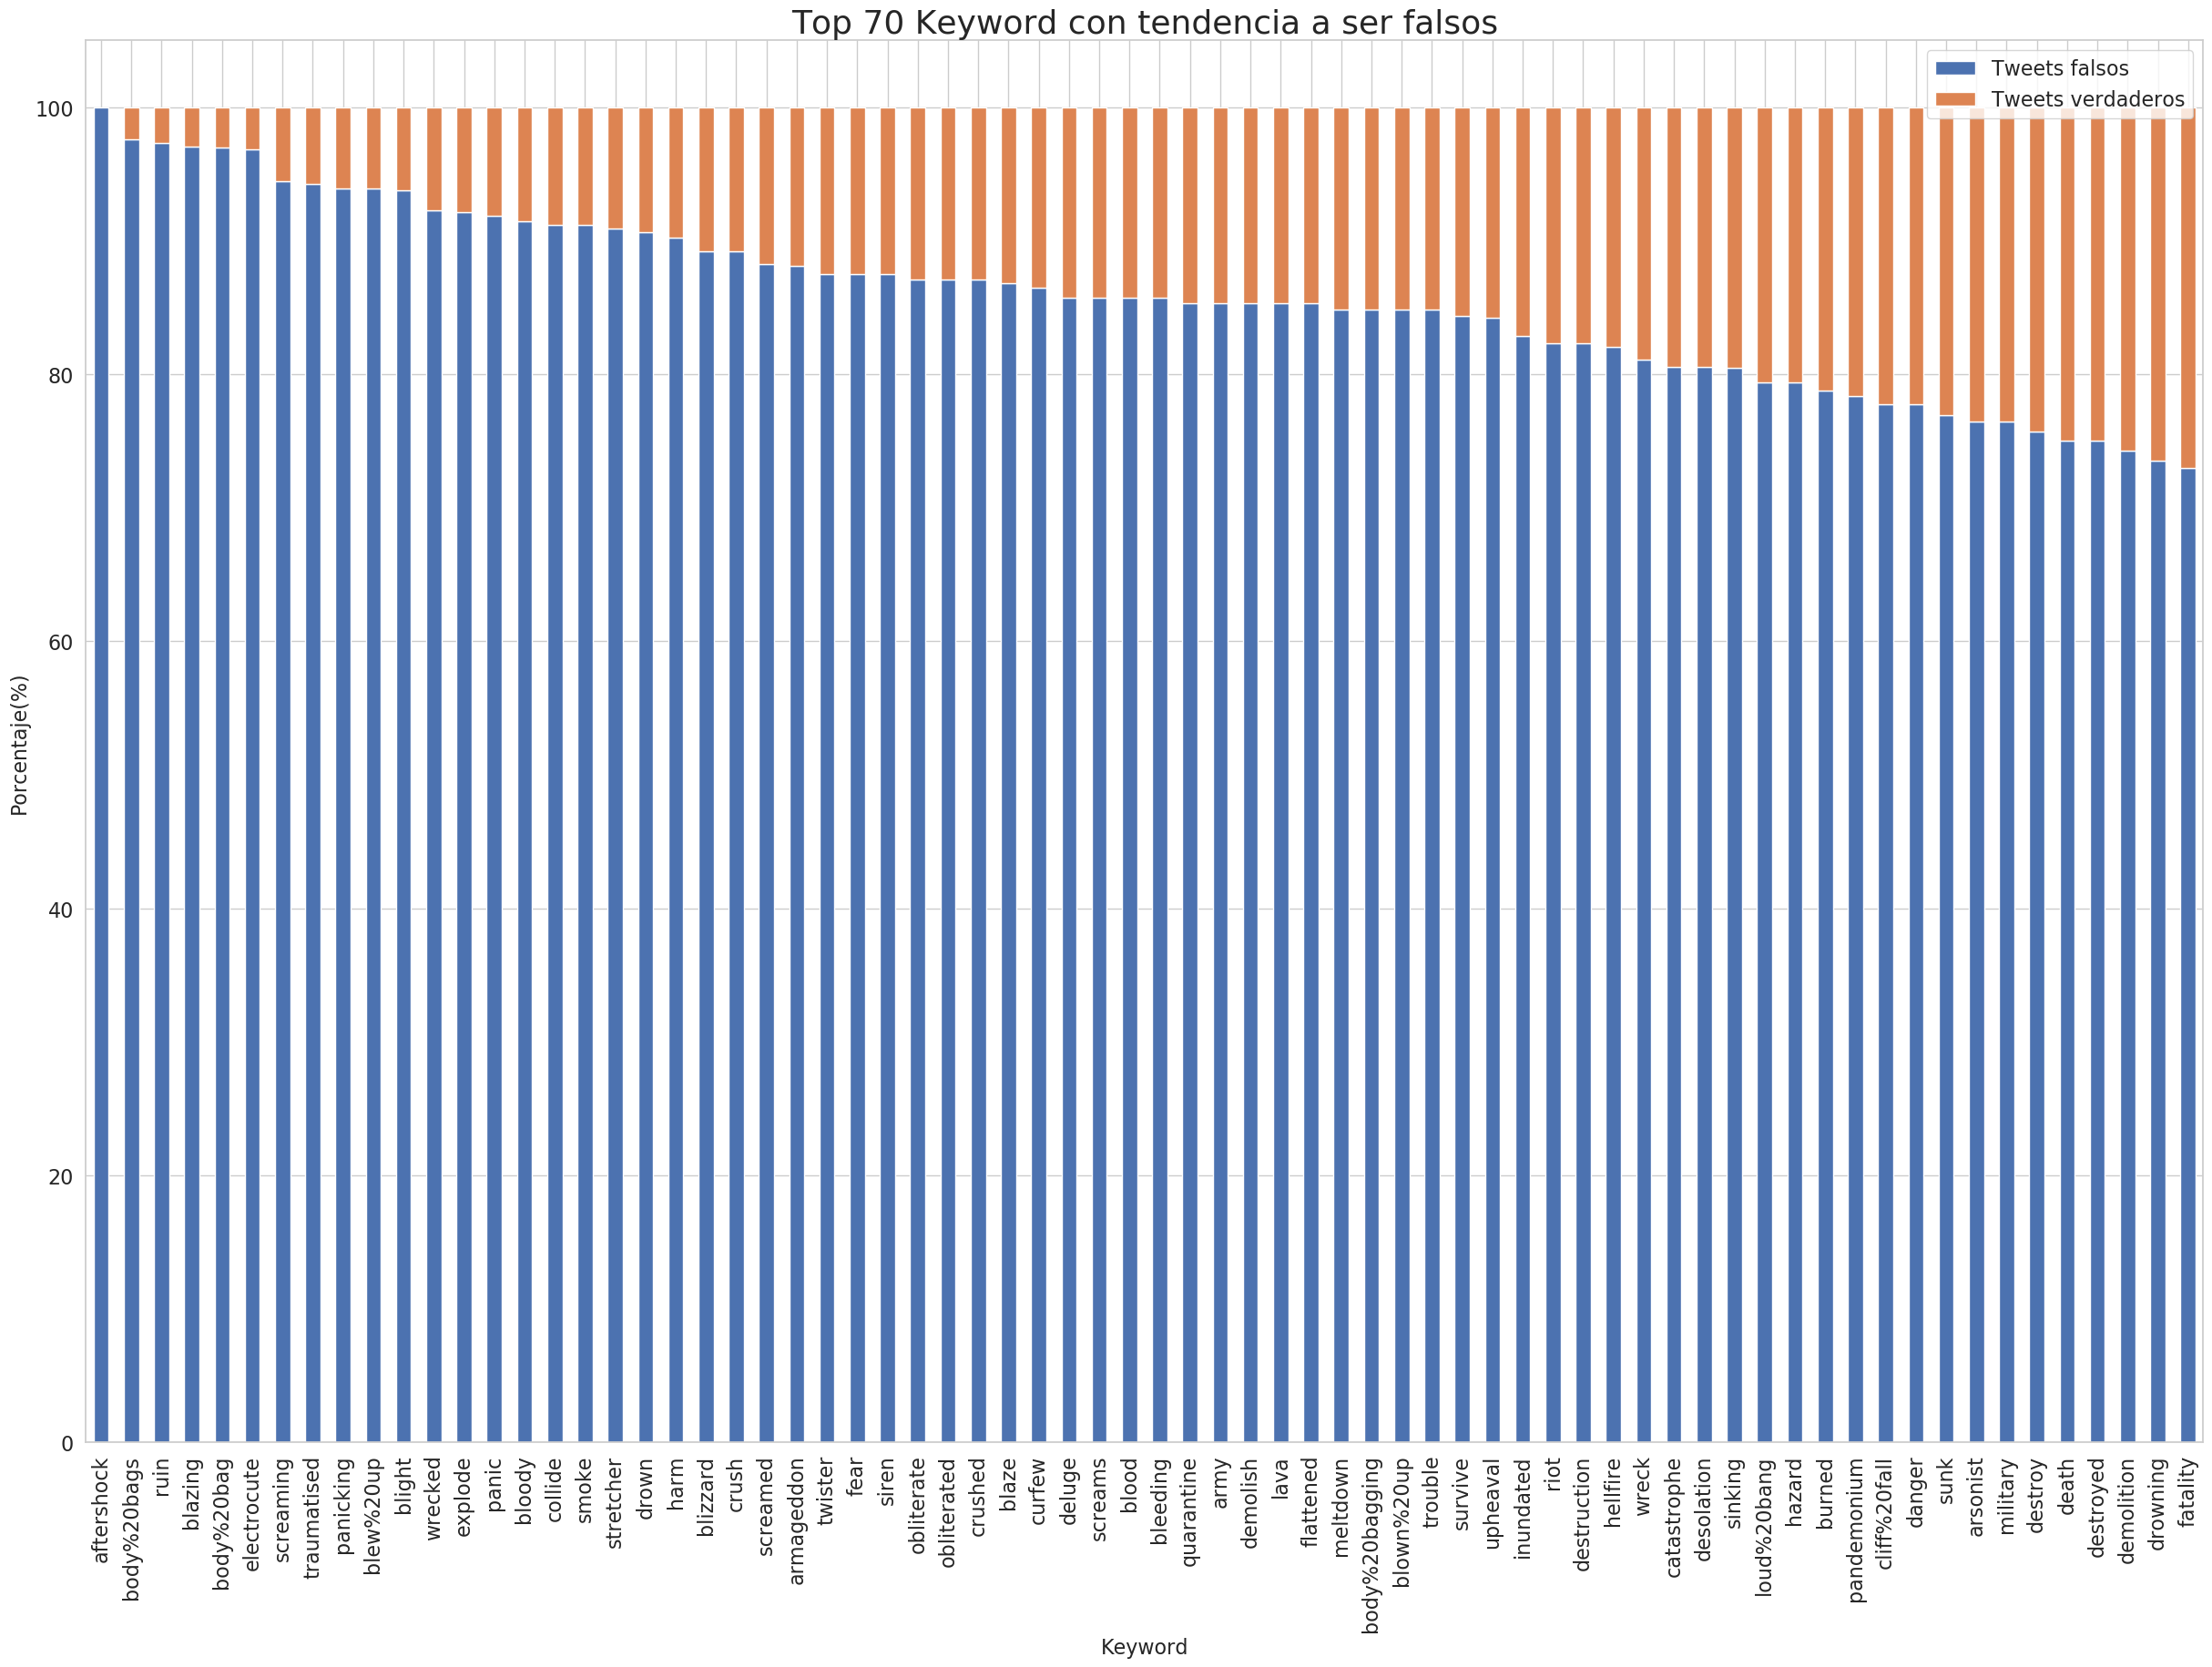

In [612]:
ax = top_falsos.plot(kind="bar", stacked=True, fontsize= 16, figsize=(30, 20))
plt.title('Top '+str(ranking)+' Keyword con tendencia a ser falsos', fontsize=26)
plt.xlabel("Keyword", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)

## Analisis de la veracidad según los caracteres

Ahora procederemos a analizar la veracidad de los tweets teniendo en cuenta algunos caracteres especiales que pueden tener, en este caso serán el arroba ('@'), el hashtag ('#'), si tiene un link ('http') o sino tiene ninguno de ellos.

In [613]:
df['largo_del_texto'] = df['text'].apply(len)
df['mencion'] = df['text'].str.contains('@').astype(int)
df['hashtag'] = df['text'].str.contains('#').astype(int)
df['url'] = df['text'].str.contains('http').astype(int)
df['Sin palabras clave'] =  ((df['text'].str.contains('@') == False) & \
(df['text'].str.contains('#')  == False) & \
(df['text'].str.contains('http') == False)).astype(int)
df.tail(10)

,id,keyword,location,text,target,largo_del_texto,mencion,hashtag,url,Sin palabras clave
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1,136,0,0,1,0
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,136,0,1,1,0
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1,114,0,0,0,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,121,0,0,1,0
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1,134,0,1,1,0
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,0,0,1,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,1,0,0,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,0,0,1,0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,0,0,0,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,94,0,0,1,0


In [614]:
tweets_red = df[['target', 'mencion', 'hashtag', 'url', 'Sin palabras clave']]
plotdata = tweets_red.groupby('target').agg({'url': 'sum', 'mencion':  'sum', 'hashtag': 'sum', 'Sin palabras clave': 'sum'})
plotdata.columns = ['Contiene URL(http)', 'Contiene mención(@user)', 'Contiene Hashtag(#)', 'Sin palabras clave']
plotdata = plotdata.transpose()
plotdata[0] = plotdata[0]*100/cant_falsos
plotdata[1] = plotdata[1]*100/cant_verdaderos
plotdata.columns = ['Tweets falsos', 'Tweets verdaderos']
plotdata

,Tweets falsos,Tweets verdaderos
Contiene URL(http),41.43,66.40
Contiene mención(@user),31.39,20.67
Contiene Hashtag(#),20.41,26.75
Sin palabras clave,30.56,15.81


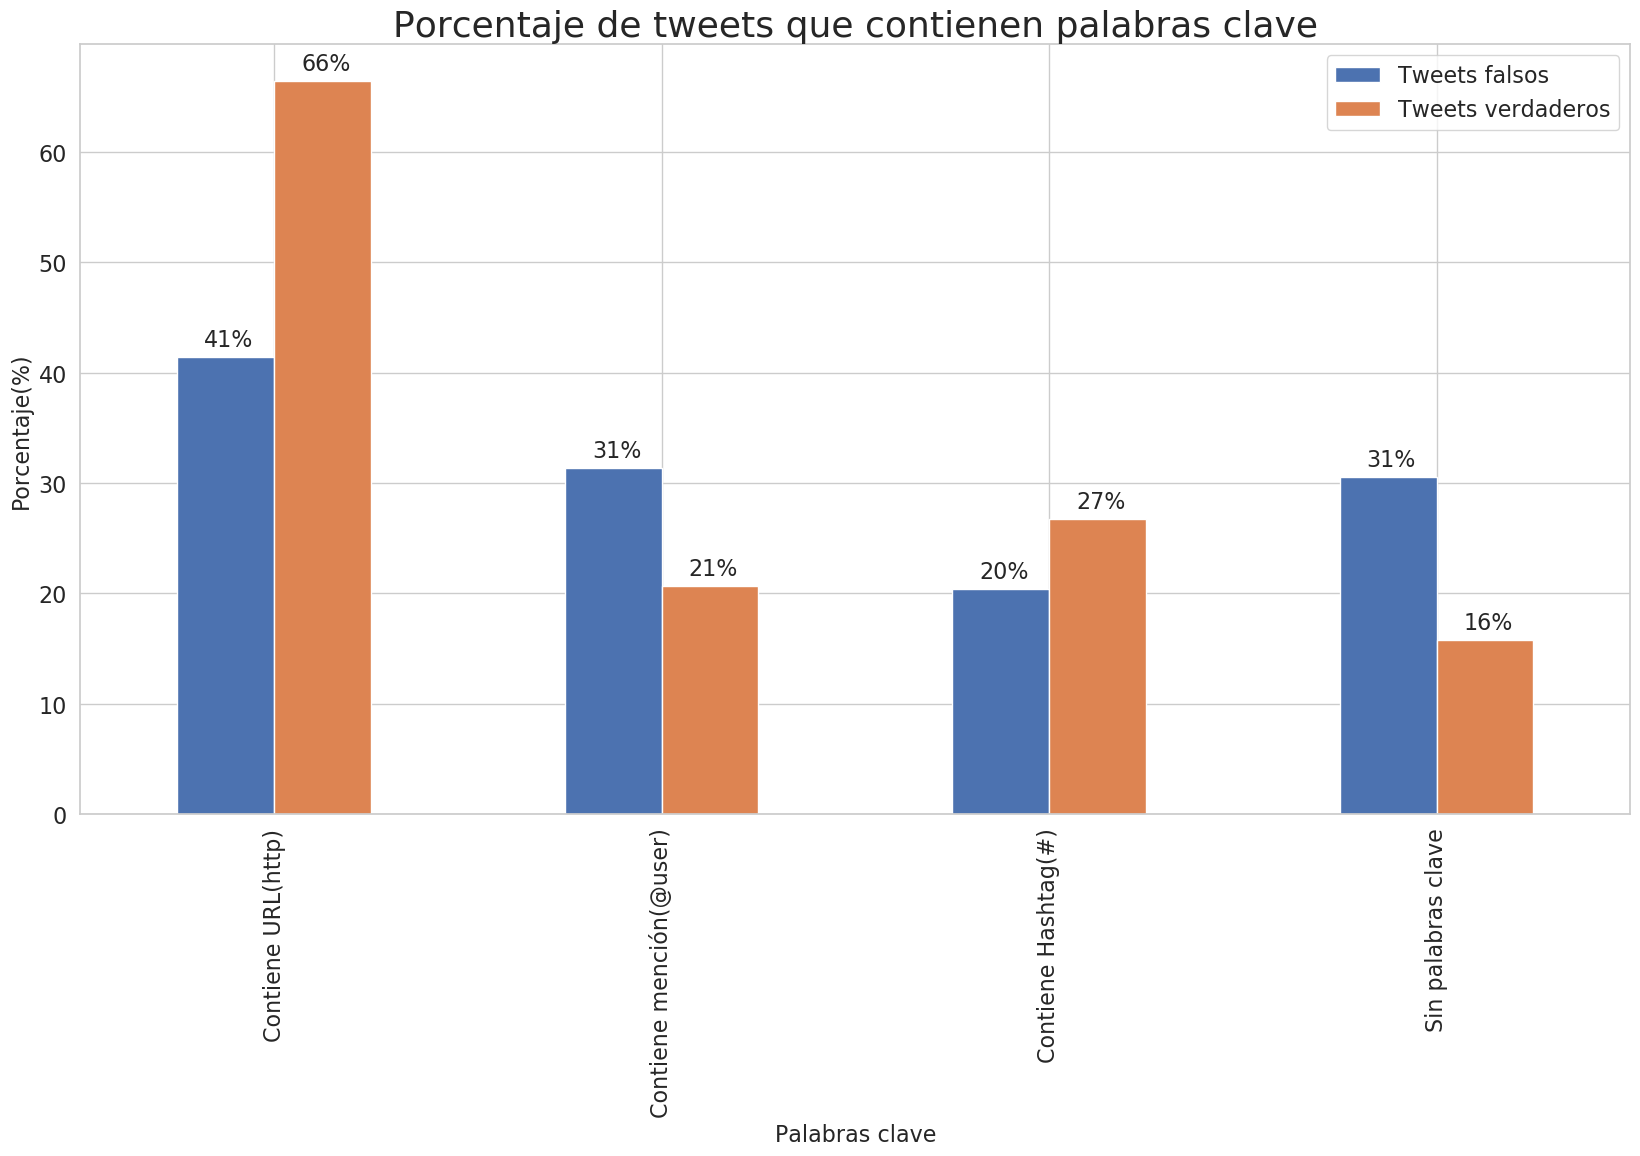

In [615]:
ax = plotdata.plot(kind="bar", stacked=False, fontsize= 16)
plt.title("Porcentaje de tweets que contienen palabras clave", fontsize=26)
plt.xlabel("Palabras clave", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0%}".format(height/100), xy=(x+0.07, y + height + 1), fontsize=16)

Conclusion

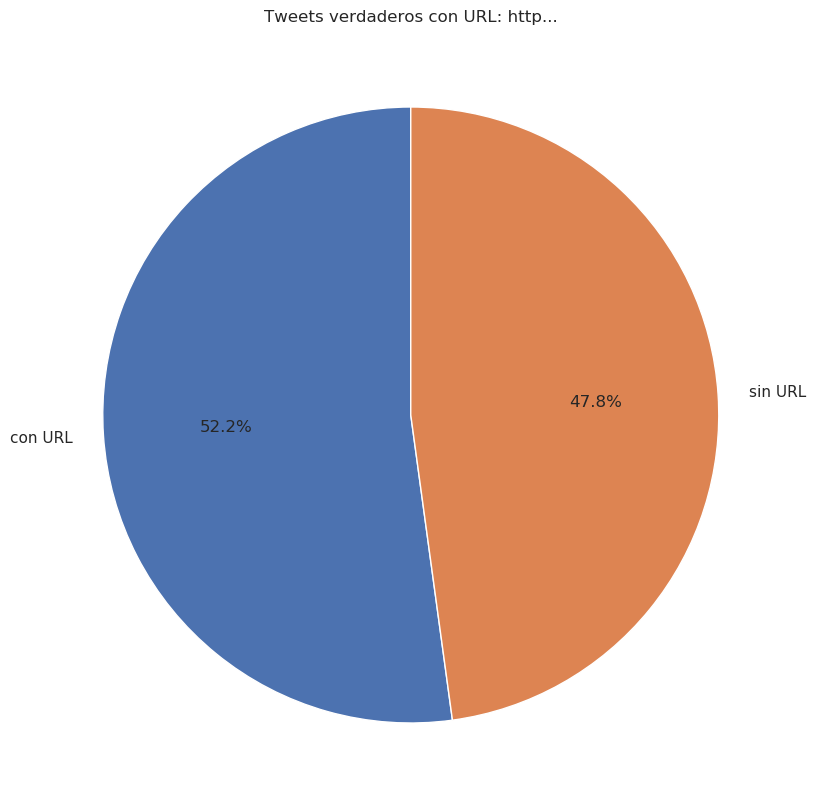

In [616]:
tw_reales_con_link = df[df['url'] == True]['url'].count()
tw_reales_sin_link = df[df['url'] == False]['url'].count()
grafico = plt.pie([tw_reales_con_link, tw_reales_sin_link],labels=['con URL', 'sin URL'], startangle=90, autopct='%1.1f%%')
plt.title("Tweets verdaderos con URL: http...")
plt.show(grafico)

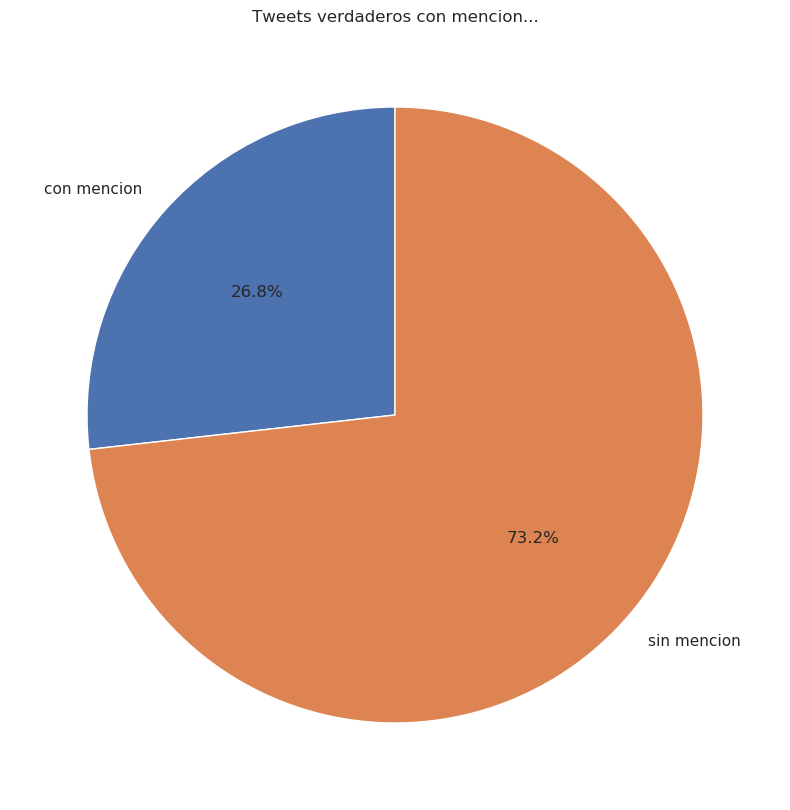

In [617]:
tw_reales_con_mencion = df[df['mencion'] == True]['mencion'].count()
tw_reales_sin_mencion = df[df['mencion'] == False]['mencion'].count()
grafico = plt.pie([tw_reales_con_mencion, tw_reales_sin_mencion],labels=['con mencion', 'sin mencion'], startangle=90, autopct='%1.1f%%')
plt.title("Tweets verdaderos con mencion...")
plt.show(grafico)

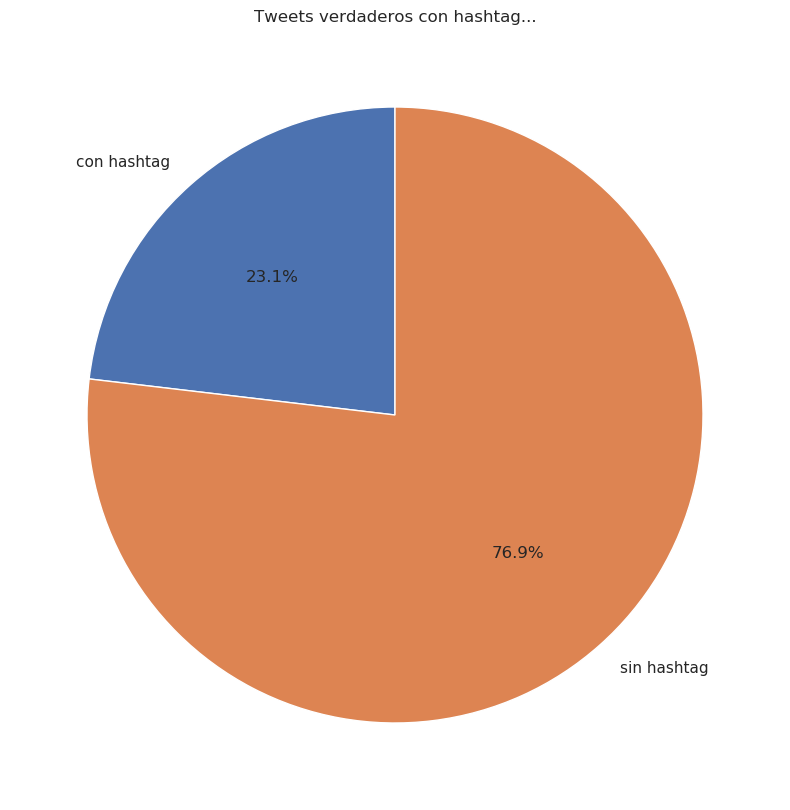

In [618]:
tw_reales_con_hashtag = df[df['hashtag'] == True]['hashtag'].count()
tw_reales_sin_mencion = df[df['hashtag'] == False]['hashtag'].count()
grafico = plt.pie([tw_reales_con_hashtag, tw_reales_sin_mencion],labels=['con hashtag', 'sin hashtag'], startangle=90, autopct='%1.1f%%')
plt.title("Tweets verdaderos con hashtag...")
plt.show(grafico)

<h2>Veamos las 20 palabras más frecuentes en tweets verdaderos</h2>

Descripción del analisis

In [619]:
#Funcion para dividir texto en lista de palabras
def split(txt, seps):
    default_sep = seps[0]
    for sep in seps[1:]:
        txt = txt.replace(sep, default_sep)
    return [i.strip() for i in txt.split(default_sep)]

#Funcion para contar palabras en listas y almacenar en un diccionario
def agregar(words_dict, new_words):
    for word in new_words:
        if word in words_dict:
            words_dict[word] += 1
        else:
            words_dict[word] = 1

In [620]:
verdaderos_words_dict = {}
tweets_verdaderos = df[df.target == 1]
tweets_verdaderos["text"].apply(lambda x: split(x, (',','.',' '))).apply(lambda x: agregar(verdaderos_words_dict, x))
verdaderos_palabras = pd.DataFrame.from_dict(verdaderos_words_dict, orient='index')
verdaderos_palabras.sort_values(by=0, ascending=False).head(20)

,0
,3610
http://t,2335
the,1060
in,1043
of,890
a,747
to,707
and,467
-,390
on,389


Como podia esperarse son en su mayoria articulos, pronombres, preposiciones, etc.
Probablemente estos también sean las palabras más frecuentes en tweets falsos. Si eleminamos de nuestro conjunto las palabras frecuentes que tengan en común lograremos filtrar la mayoria de estas palabras irrelevantes y además nos quedaran aquellas que son menos frecuentes en los tweets falsos, información que puede ser de utilidad para intentar distinguir ambos tipos de tweets.

In [621]:
tweets_falsos = df[df.target == 0]
falsos_words_dict = {}
tweets_falsos["text"].apply(lambda x: split(x, (',','.',' '))).apply(lambda x: agregar(falsos_words_dict, x))
falsos_palabras = pd.DataFrame.from_dict(falsos_words_dict, orient='index')
falsos_keys = falsos_palabras.sort_values(by=0, ascending=False).head(100).index
#Aún con el filtrado quedan algunas palabras irrelevantes. Las elimino manualmente 
irrelevantes_keys = ['over', 'were', 'than', 'More', 'S', 'This']
verdaderos_top_palabras = verdaderos_palabras.drop(labels=falsos_keys).drop(labels=irrelevantes_keys).sort_values(by=0, ascending=False).head(20)
verdaderos_top_palabras

,0
fire,123
California,94
killed,86
suicide,71
fires,70
Hiroshima,62
disaster,62
Northern,60
train,58
bomb,57


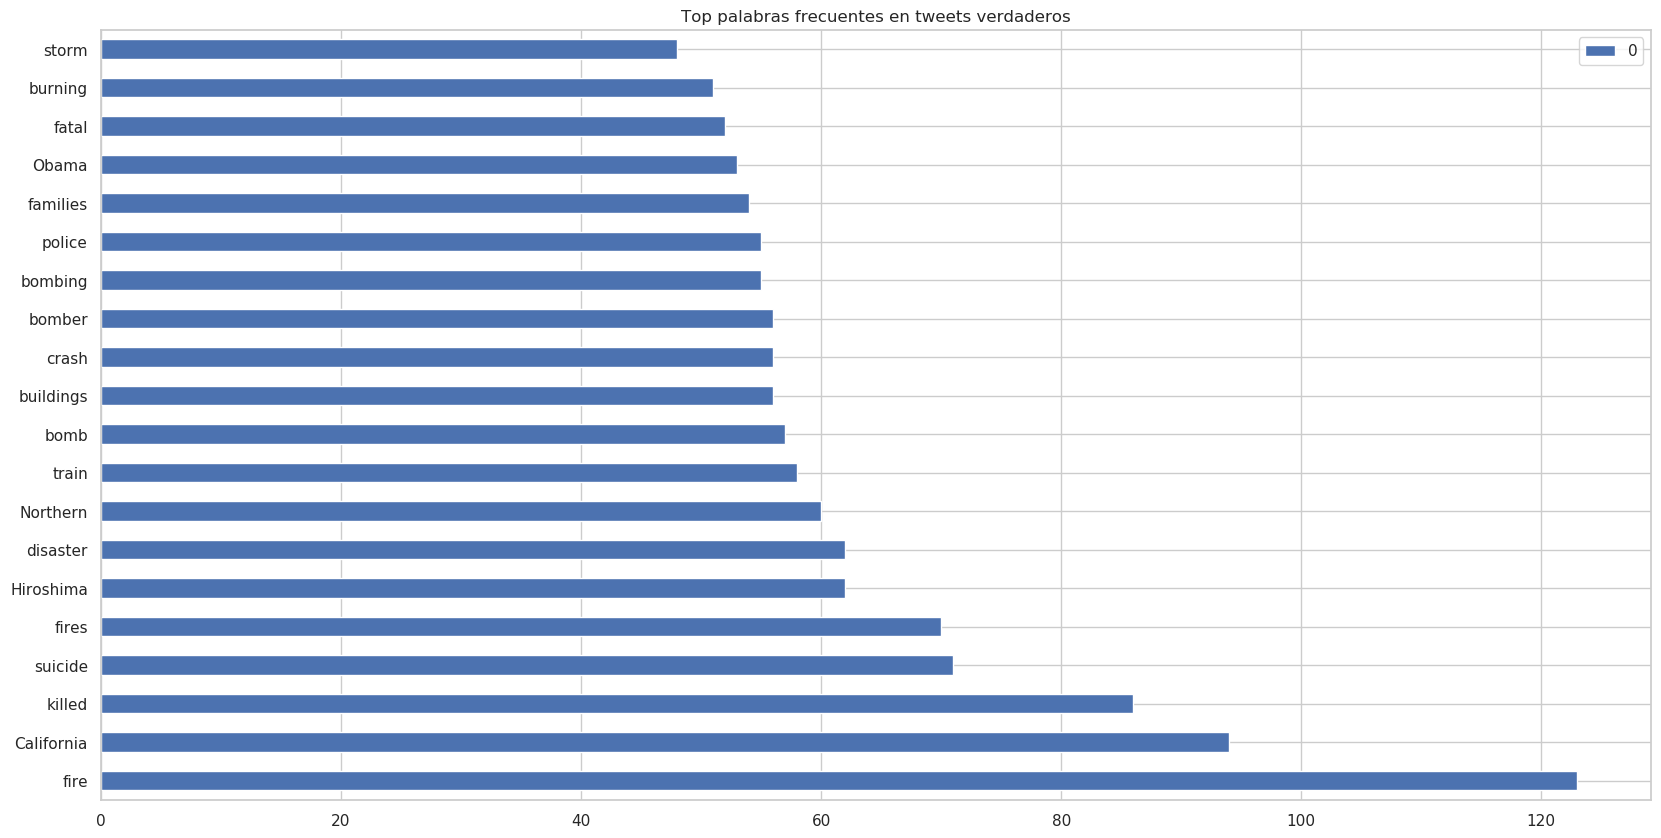

In [622]:
verdaderos_top_palabras.head(20).plot(kind = 'barh', figsize = (20, 10), rot = 0, title = "Top palabras frecuentes en tweets verdaderos")

Procedo realizar lo mismo con los tweets falsos. Esta vez directamente filtraremos las palabras comunes.

In [623]:
#Debo quitar dos palabras de las keys a eliminar porque no aparecen en las palabras de los tweets falsos, lo que ocaciona error
verdaderos_keys = verdaderos_palabras.drop(['Northern', 'bomber']).sort_values(by=0, ascending=False).head(100).index
falsos_palabras.drop(labels=verdaderos_keys).sort_values(by=0, ascending=False).head(20)

,0
??,187
i,119
he,109
can,107
if,107
do,93
don't,88
her,87
new,86
his,86


In [624]:
irrelevantes_keys = ['can', 'if', 'do', 'don\'t', 'her', 'his', 'his', 'it\'s', 'would', 'now', 'what', 'You', 'My', 'how', 'got', '\'']
falsos_top_palabras = falsos_palabras.drop(labels=verdaderos_keys).drop(labels=irrelevantes_keys).sort_values(by=0, ascending=False).head(20)
falsos_top_palabras

,0
??,187
i,119
he,109
new,86
????,75
know,73
Full,69
New,69
see,68
video,68


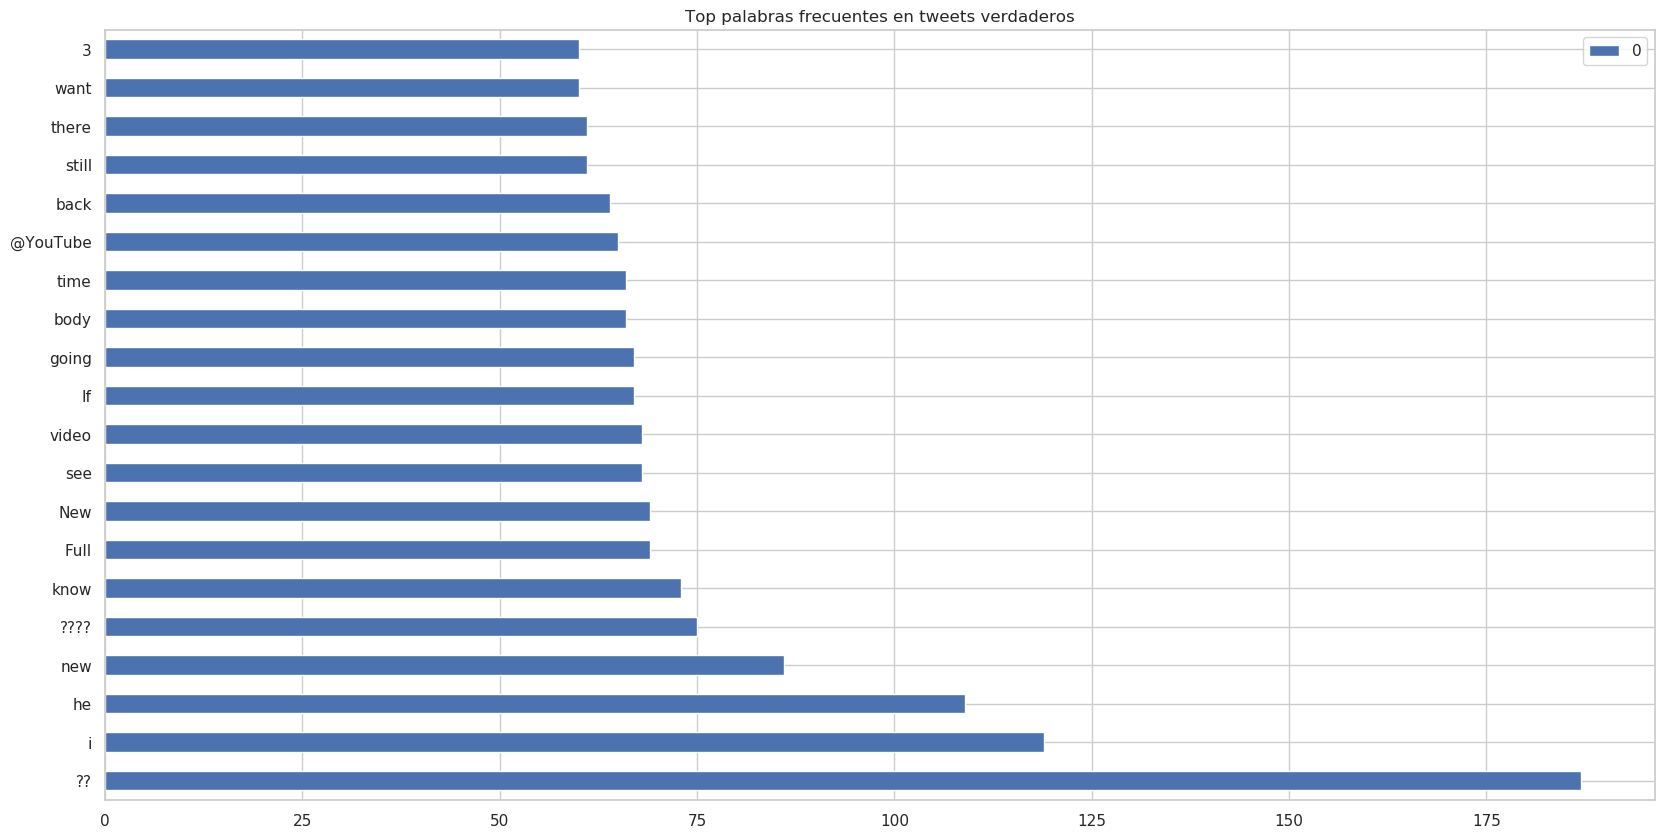

In [625]:
falsos_top_palabras.head(20).plot(kind = 'barh', figsize = (20, 10), rot = 0, title = "Top palabras frecuentes en tweets verdaderos")

Podemos rescatar que el signo de interrogacion es usado frecuentemente en los tweets falsos 

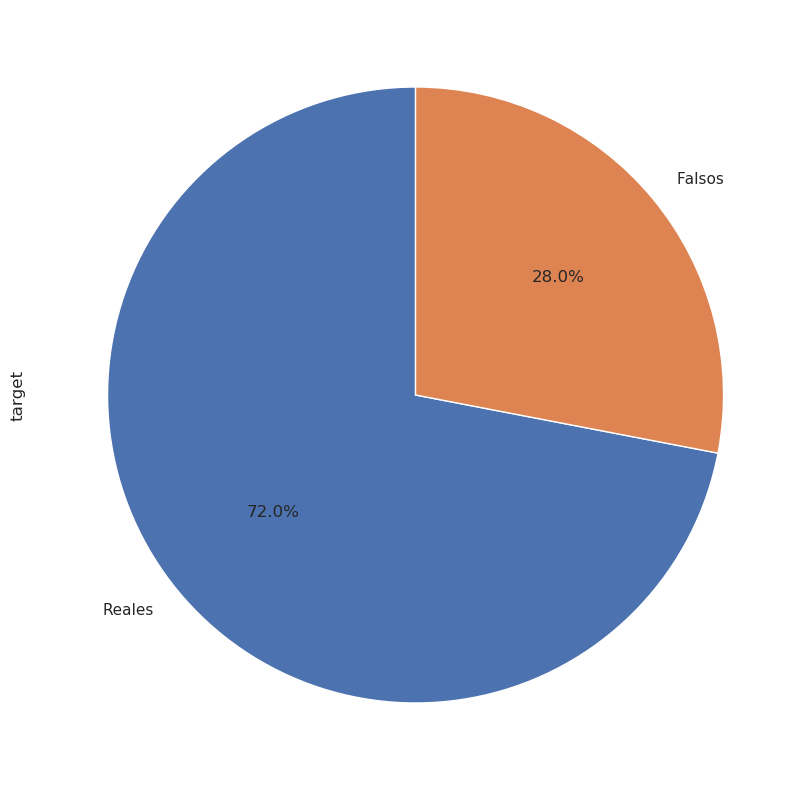

In [626]:
df.loc[df['text'].str.contains('\?'), 'target'].value_counts().plot.pie(labels=['Reales', 'Falsos'], figsize = (10, 10), startangle=90, autopct='%1.1f%%')

In [627]:
df.loc[df['text'].str.contains('fire', case=False), 'target'].value_counts()

1    344
0    129
Name: target, dtype: int64

In [628]:
df.loc[df['text'].str.contains('!', case=False), 'target'].value_counts()

0    523
1    196
Name: target, dtype: int64

Analisis de las ids ( no hay mucho, tal vez valga la pena sacarlo)

In [629]:
ids = pd.DataFrame(df['id'].value_counts())
ids.columns = ['cantidad']
ids.loc[ids.cantidad > 2]
#cada id es unico y solo tuitea una vez

,cantidad


## Analisis de las localizaciones

En esta sección analizaremos las localizaciones desde donde producen los tweets

In [630]:
n = 20 # Top n ciudades
grouped_by_location = df.groupby(['location', 'target']).agg({'target': 'count'})
grouped_by_location = grouped_by_location.unstack(level=1)
grouped_by_location = grouped_by_location.reset_index()
grouped_by_location = grouped_by_location.droplevel(0, axis=1)
grouped_by_location[[0, 1]] = grouped_by_location[[0,1]].fillna(value=0)
grouped_by_location['General'] = grouped_by_location[0]+grouped_by_location[1]
grouped_by_location.columns=['Lugar', 'Falsos', 'Verdaderos', 'General']
top_n_general = grouped_by_location[['Lugar', 'General']].sort_values('General', ascending=False).head(n).iloc[::-1]
top_n_verdaderos = grouped_by_location[['Lugar', 'Verdaderos']].sort_values('Verdaderos', ascending=False).head(n).iloc[::-1]
top_n_falsos = grouped_by_location[['Lugar', 'Falsos']].sort_values('Falsos', ascending=False).head(n).iloc[::-1]
top_n_general

,Lugar,General
2249,San Francisco,14.00
577,"California, USA",15.00
1837,"New York, NY",15.00
934,Everywhere,15.00
574,California,17.00
368,Australia,18.00
654,"Chicago, IL",18.00
2868,Worldwide,19.00
1373,Kenya,20.00
2778,"Washington, DC",21.00


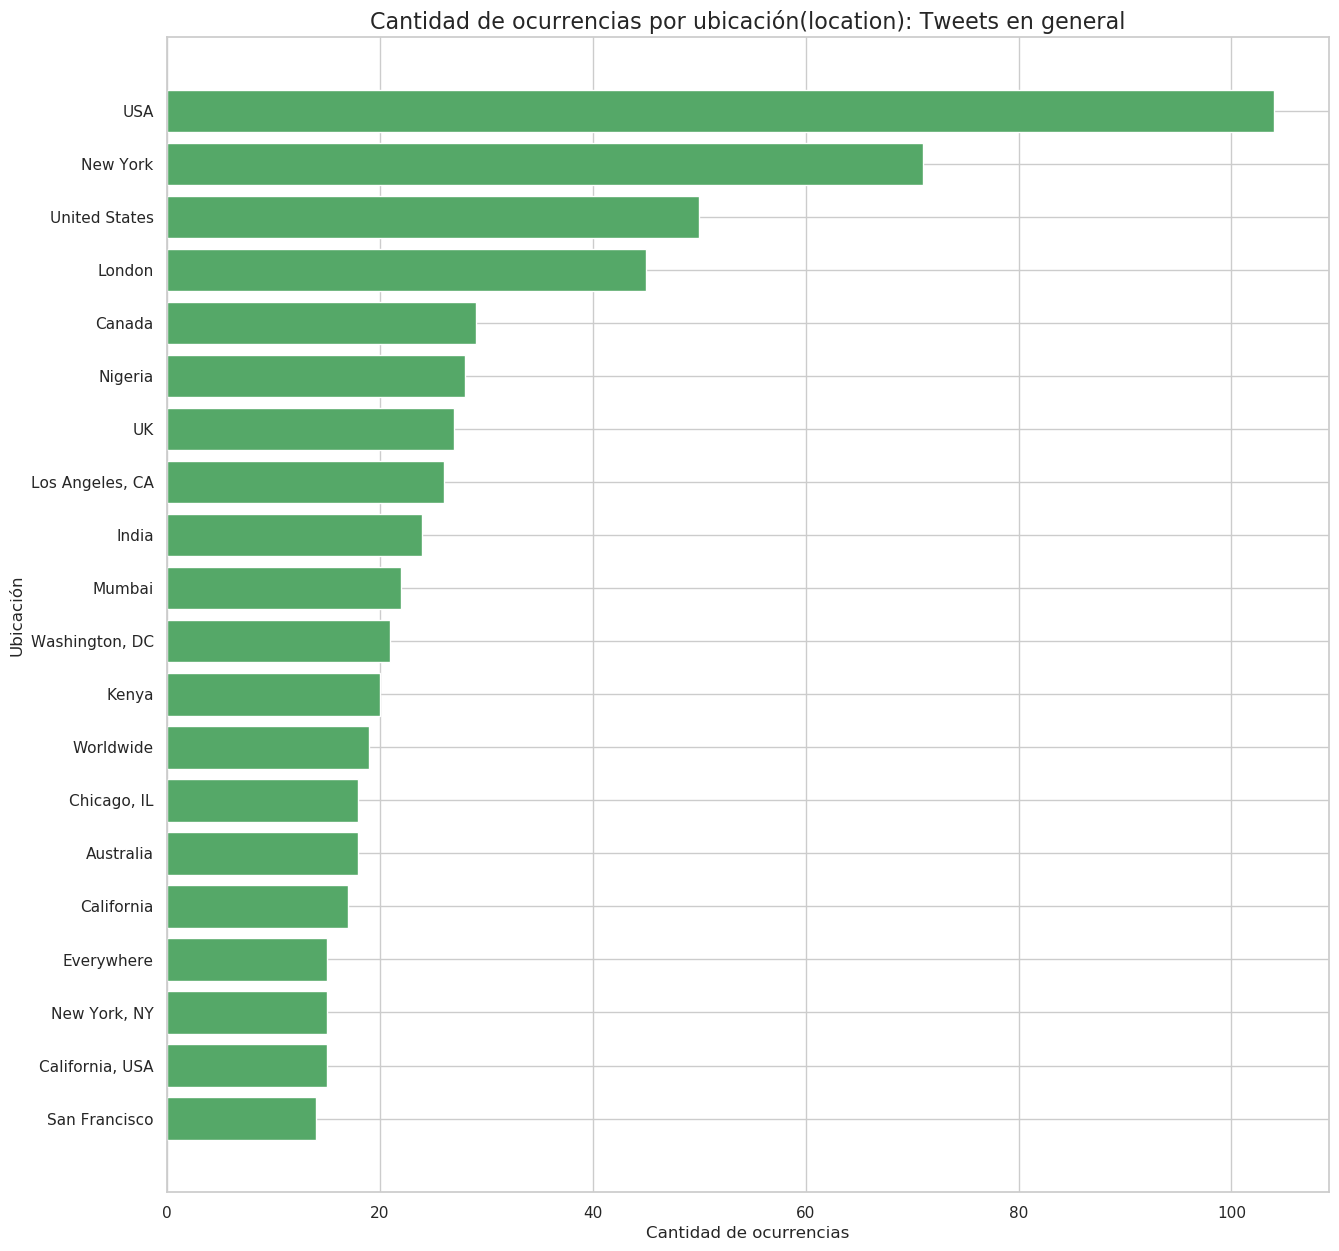

In [631]:
# Tamaño
plt.figure(figsize=(15,15))
# Título
plt.title('Cantidad de ocurrencias por ubicación(location): Tweets en general', fontsize=16)
# Eje X
plt.xlabel('Cantidad de ocurrencias')
# Eje Y
plt.ylabel('Ubicación')
plt.barh(y=top_n_general.Lugar, width=top_n_general.General, color='C2')

plt.show()

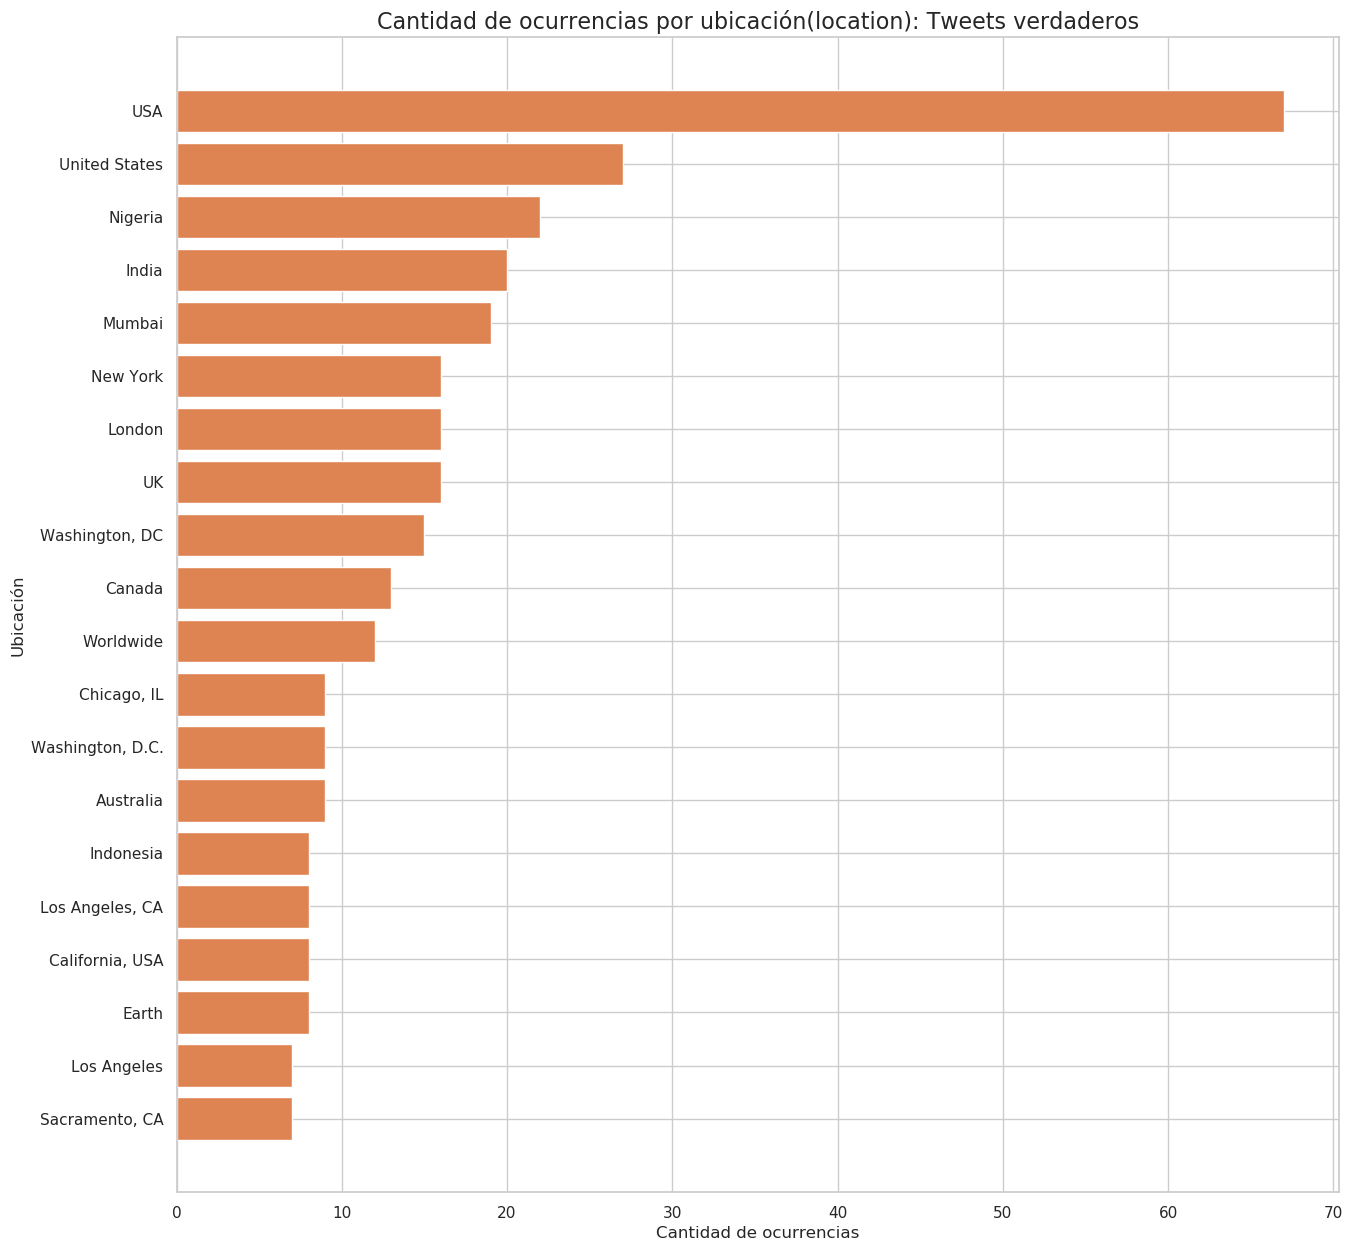

In [632]:
# Tamaño
plt.figure(figsize=(15,15))
# Título
plt.title('Cantidad de ocurrencias por ubicación(location): Tweets verdaderos', fontsize=16)
# Eje X
plt.xlabel('Cantidad de ocurrencias')
# Eje Y
plt.ylabel('Ubicación')
plt.barh(y=top_n_verdaderos.Lugar, width=top_n_verdaderos.Verdaderos, color='C1')

plt.show()

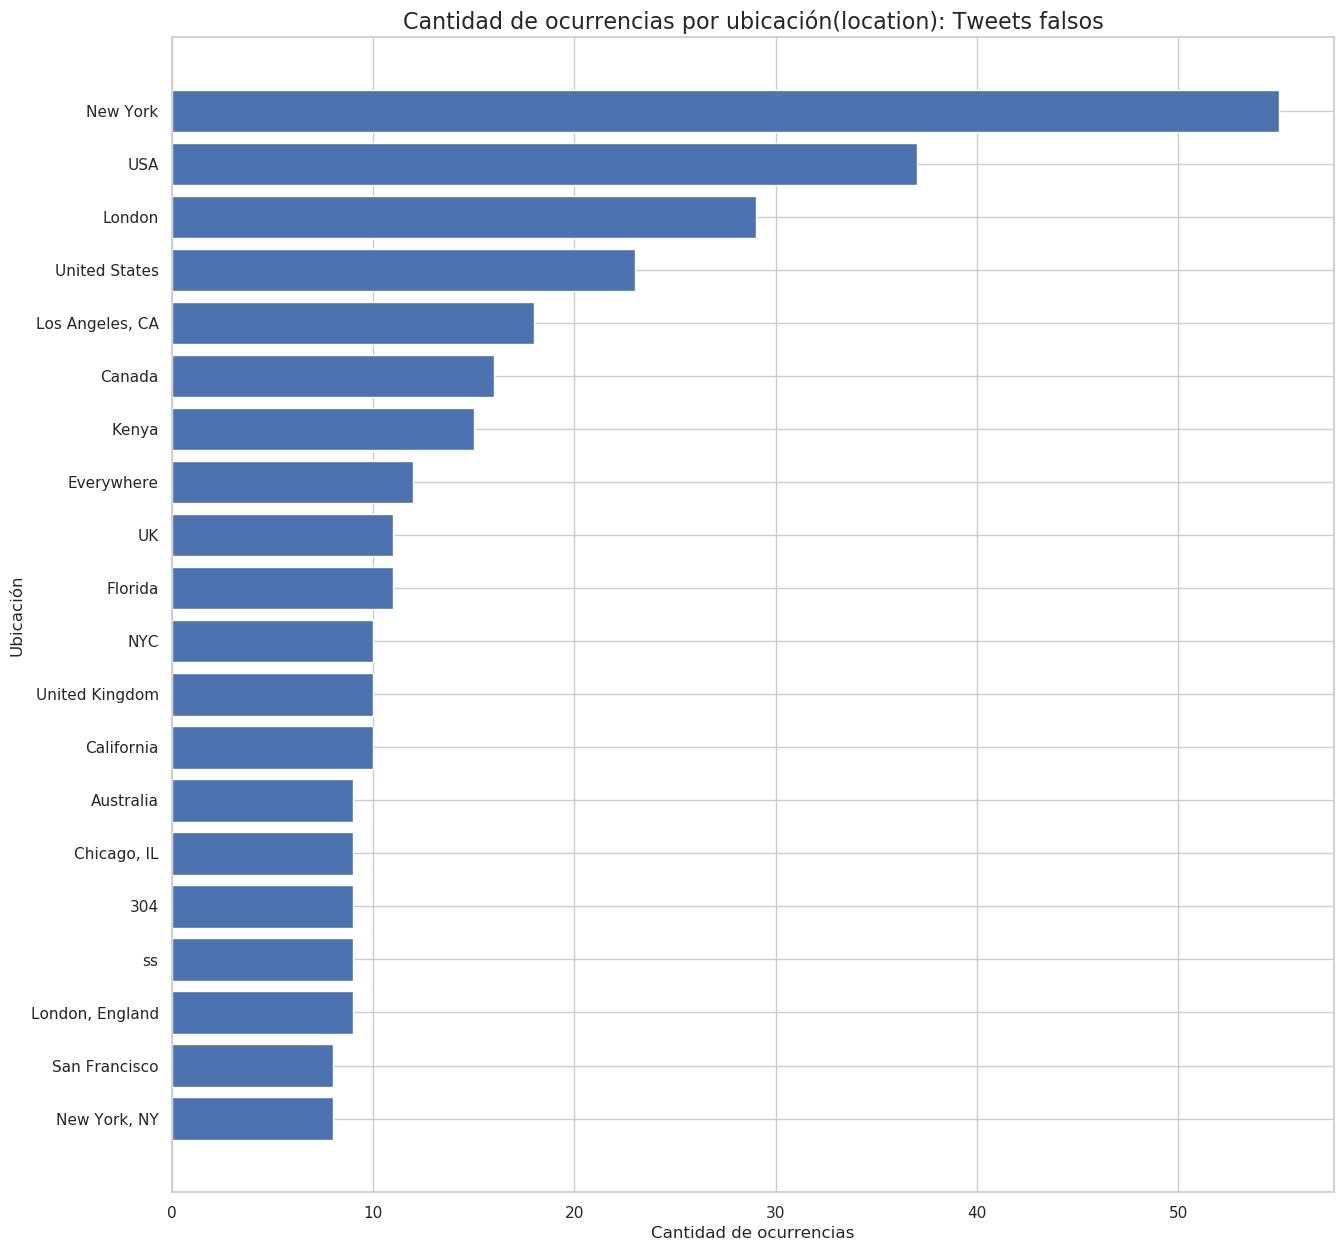

In [633]:
# Tamaño
plt.figure(figsize=(15,15))
# Título
plt.title('Cantidad de ocurrencias por ubicación(location): Tweets falsos', fontsize=16)
# Eje X
plt.xlabel('Cantidad de ocurrencias')
# Eje Y
plt.ylabel('Ubicación')

plt.barh(y=top_n_falsos.Lugar, width=top_n_falsos.Falsos, color='C0')

plt.show()

In [634]:
df_ver_loc = tweets_reales.groupby(['location'])['target'].agg(['size'])
df_ver_loc.columns = ['tweets_verdaderos']

df_falsos_loc = tweets_falsos.groupby(['location'])['target'].agg(['size'])
df_falsos_loc.columns = ['tweets_falsos']

df_location = pd.merge(df_falsos_loc, df_ver_loc, on='location', how='outer')
df_location['tweets_verdaderos'].fillna(0, inplace=True)
df_location['tweets_falsos'].fillna(0, inplace=True)
df_location = df_location.loc[(df_location.tweets_falsos >10) | (df_location.tweets_verdaderos > 10)] 
df_location.sort_index()

,tweets_falsos,tweets_verdaderos
location,,
Canada,16.00,13.00
Everywhere,12.00,3.00
Florida,11.00,3.00
India,4.00,20.00
Kenya,15.00,5.00
London,29.00,16.00
"Los Angeles, CA",18.00,8.00
Mumbai,3.00,19.00
New York,55.00,16.00


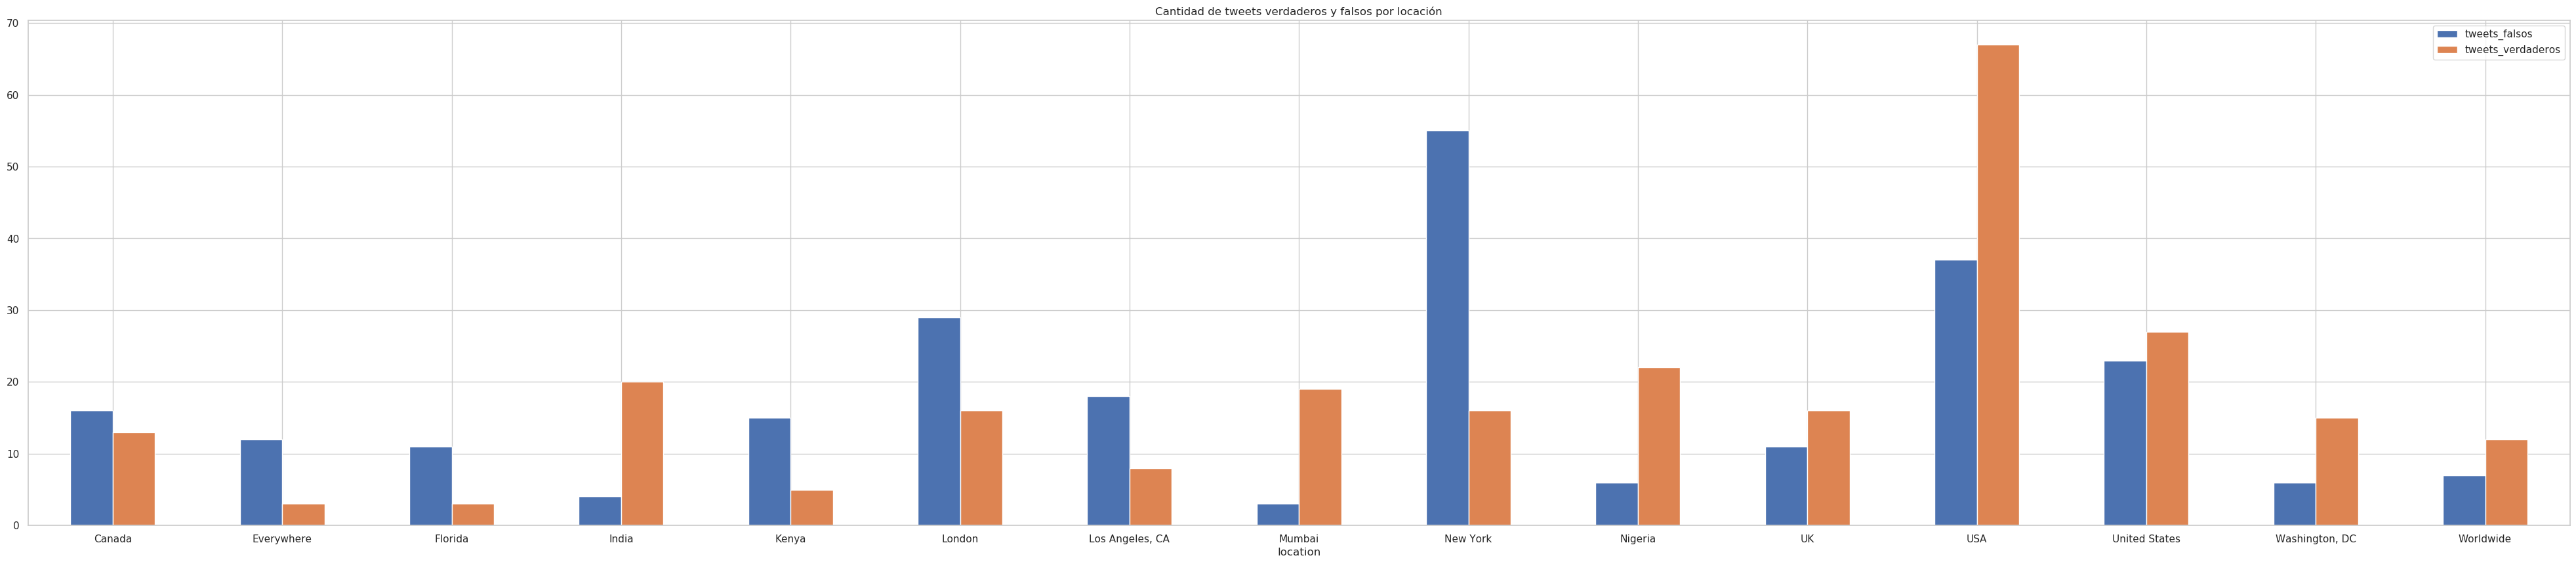

In [635]:
df_location.plot(kind = 'bar', figsize = (50, 10), rot = 0, title = "Cantidad de tweets verdaderos y falsos por locación")
#mejorar el grafico

Se observa que "USA" tiene una mayoria de tweets verdaderos sin embargo "Nueva York" tiene una mayoria de tweets falsos

# Relación entre el largo del texto y el target

Ahora veremos que relación hay entre la longitud del tweet y su veracidad.
Primero analizaremos la longitud sola para tener una idea general y luego lo uniremos con el target.

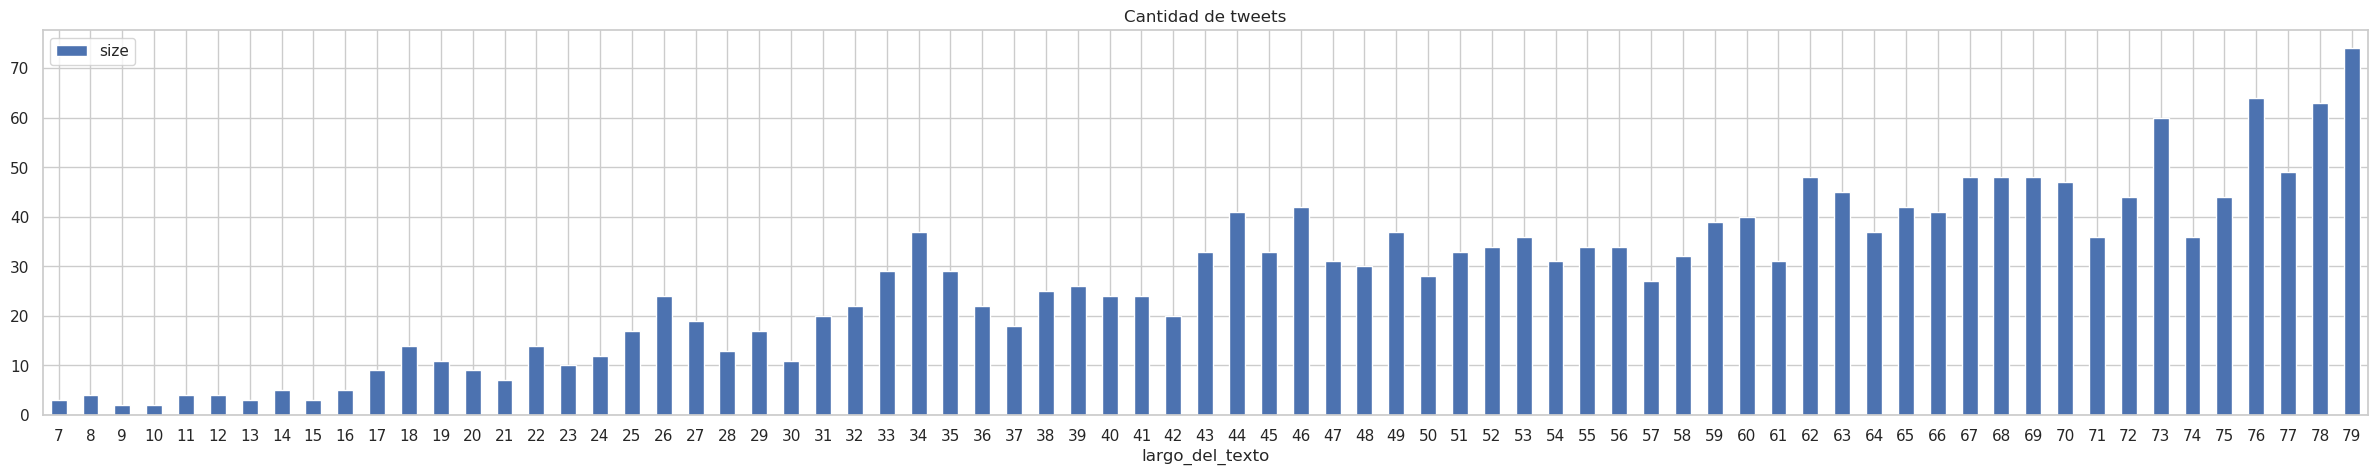

In [636]:
cantidad_de_tweets1 = df.loc[(df.largo_del_texto < 80)]
cantidad_de_tweets1 = cantidad_de_tweets1.groupby(['largo_del_texto'])['largo_del_texto'].agg(['size'])
cantidad_de_tweets1.plot(kind = 'bar', figsize = (30, 5), rot = 0, title = "Cantidad de tweets")

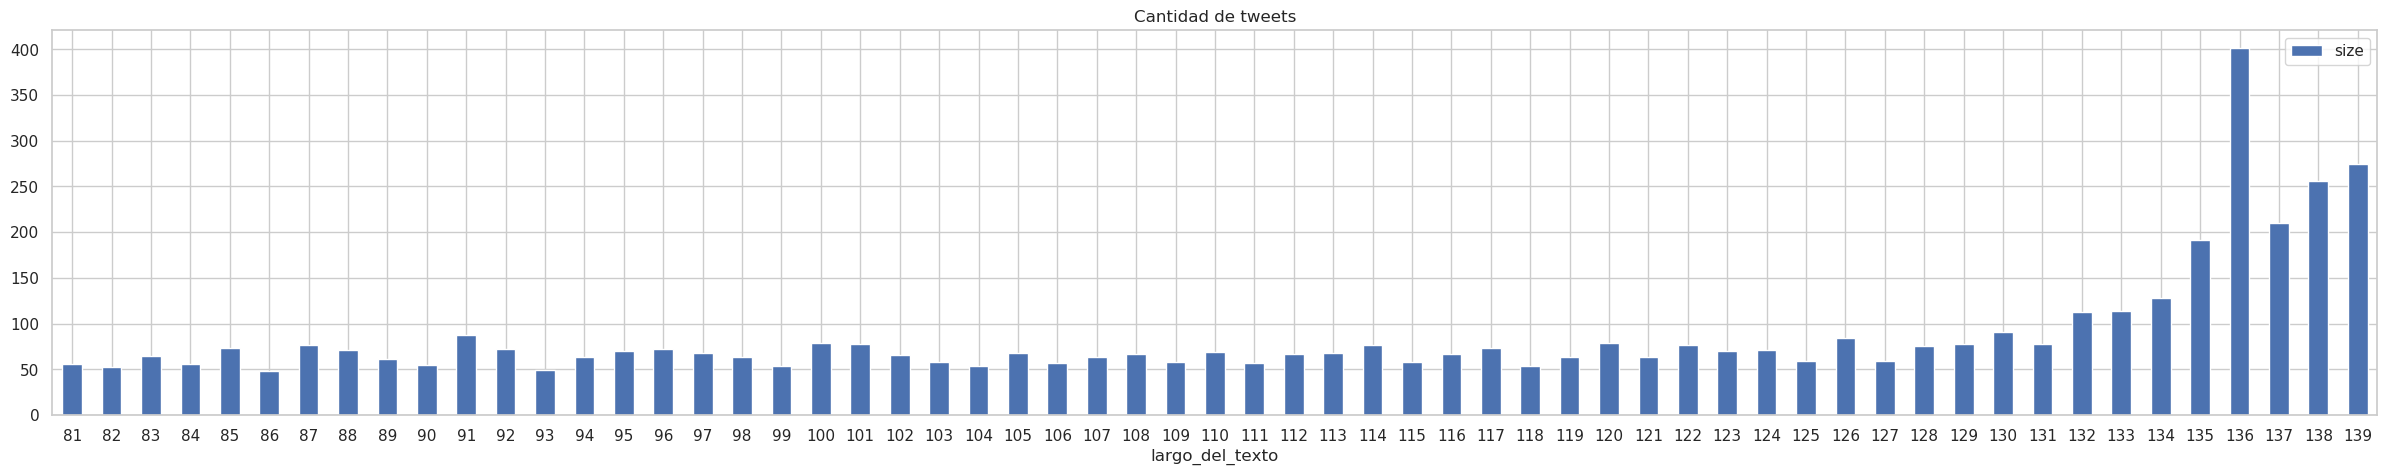

In [637]:
cantidad_de_tweets2 = df.loc[(df.largo_del_texto > 80) & (df.largo_del_texto < 140)]
cantidad_de_tweets2 = cantidad_de_tweets2.groupby(['largo_del_texto'])['largo_del_texto'].agg(['size'])
cantidad_de_tweets2.plot(kind = 'bar', figsize = (30, 5), rot = 0, title = "Cantidad de tweets")

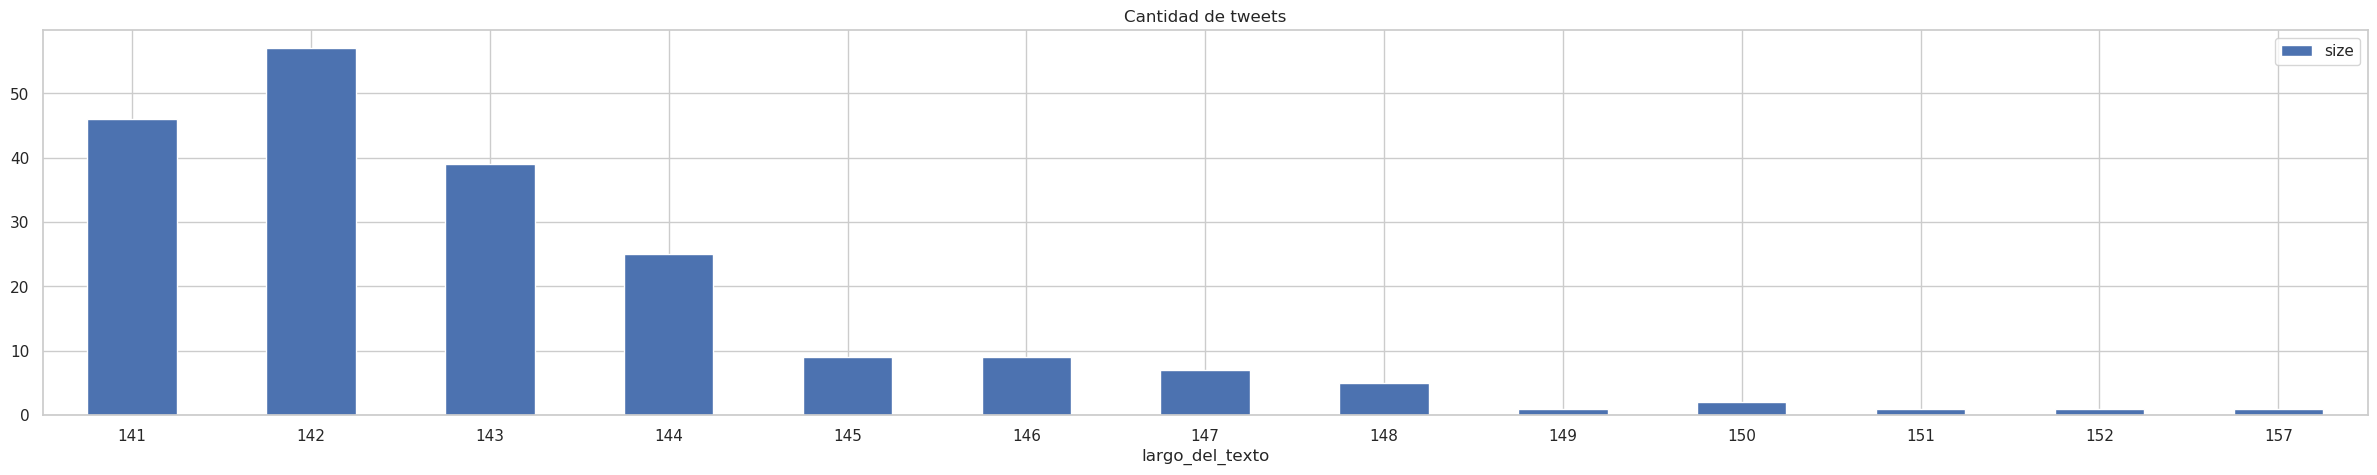

In [638]:
cantidad_de_tweets3 = df.loc[(df.largo_del_texto > 140)]
cantidad_de_tweets3 = cantidad_de_tweets3.groupby(['largo_del_texto'])['largo_del_texto'].agg(['size'])
cantidad_de_tweets3.plot(kind = 'bar', figsize = (30, 5), rot = 0, title = "Cantidad de tweets")

Podemos observar que hasta los 130 caracteres, las cantidades no se diferencian demasiado, siempre estan por debajo de 100, luego hay un crecimiento considerable y luego vuelve a bajar.
Mejorar

In [639]:
df_verdaderos = tweets_reales.groupby(['largo_del_texto'])['target'].agg(['size'])
df_falsos = tweets_falsos.groupby(['largo_del_texto'])['target'].agg(['size'])

KeyError: 'largo_del_texto'

In [ ]:
df_verdaderos['size'].plot(figsize = (15,5), rot = 90, title = "Cantidad de tweets según su longitud", color = "Red",label = 'Verdaderos', legend = ' ')
df_falsos['size'].plot(figsize = (15,5), rot = 90, color = "Blue",label = 'Falsos', legend = ' ')

Conclusion: 

In [ ]:
df_largo = df.loc[(df.largo_del_texto > 99) & (df.largo_del_texto < 141)]
df_largo = df_largo.groupby(['largo_del_texto', 'target']).agg({'target': 'count'})
df_largo = df_largo.unstack(level=1)
df_largo = df_largo.reset_index()
df_largo = df_largo.droplevel(0, axis=1)
df_largo.columns=['largo_del_texto', 'Tweets falsos', 'Tweets verdaderos'] 
df_largo['Tweets verdaderos'].fillna(0, inplace=True)
df_largo['Tweets falsos'].fillna(0, inplace=True)
df_largo['largo_del_texto'].fillna('empty', inplace=True)
df_largo = df_largo.set_index('largo_del_texto')
df_largo = df_largo.sort_values('largo_del_texto', ascending = True).head(ranking)

In [ ]:
ax = df_largo.plot(kind="bar", stacked=False, fontsize= 16)
plt.title("Cantidad de tweets verdaderos según su longitud", fontsize=26)
plt.xlabel("Longitud del tweet", fontsize= 16)
plt.ylabel("Cantidad", fontsize= 16)
plt.legend(fontsize=16)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    #ax.annotate("{:.0%}".format(height/100), xy=(x+0.07, y + height + 1), fontsize=16)

Conclusión:

## Relación entre location y keyword

In [ ]:
df_loc_key = df.groupby(['location','keyword'])['keyword'].agg(['size'])
df_loc_key.columns = ['ocurrencia']
df_loc_key = df_loc_key.reset_index()
df_loc_key

In [ ]:
df_loc_key = df_loc_key.set_index(df_loc_key.keyword)

#df_usa = df_usa.drop(['location','keyword'], axis=1)
df_loc_key = df_loc_key.drop(['keyword'], axis=1)
df_loc_key = df_loc_key.loc[df_loc_key.ocurrencia > 5]
df_loc_key